In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsforecast import StatsForecast
from statsforecast.models import(
    Naive,
    SeasonalNaive,
    SeasonalWindowAverage,
    WindowAverage,
    RandomWalkWithDrift,
    HistoricAverage,
    AutoARIMA,
    AutoETS,
    AutoCES,
    AutoTheta,
    SimpleExponentialSmoothing,
    SimpleExponentialSmoothingOptimized,
    SeasonalExponentialSmoothing,
    SeasonalExponentialSmoothingOptimized,
    Holt,
    HoltWinters,
    ADIDA,
    CrostonClassic,
    CrostonOptimized,
    CrostonSBA,
    IMAPA,
    TSB,
    MSTL,
    DynamicOptimizedTheta,
    GARCH,
    ARCH
)
from Utils import (
    plot_ts,
    plot_decompose,
    augmented_dickey_fuller,
    autocorrelation_function,
    partial_autocorrelation_function,
    wmap_error,
    rmse_error,
    mae_error,
    mse_error
)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('Data/DailyDelhiClimateTrain.csv', parse_dates=[0], index_col='date')
df_train.tail()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762
2016-12-31,15.052632,87.000000,7.325000,1016.100000
2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [4]:
df_test = pd.read_csv('Data/DailyDelhiClimateTest.csv', parse_dates=[0], index_col='date')
df_test.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [5]:
df_train.shape

(1462, 4)

In [6]:
df_test.shape

(114, 4)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2017-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      114 non-null    float64
 1   humidity      114 non-null    float64
 2   wind_speed    114 non-null    float64
 3   meanpressure  114 non-null    float64
dtypes: float64(4)
memory usage: 4.5 KB


In [9]:
df_train.duplicated().sum()

0

In [10]:
df_train.loc['2013-01-05']

meantemp           6.000000
humidity          86.833333
wind_speed         3.700000
meanpressure    1016.500000
Name: 2013-01-05 00:00:00, dtype: float64

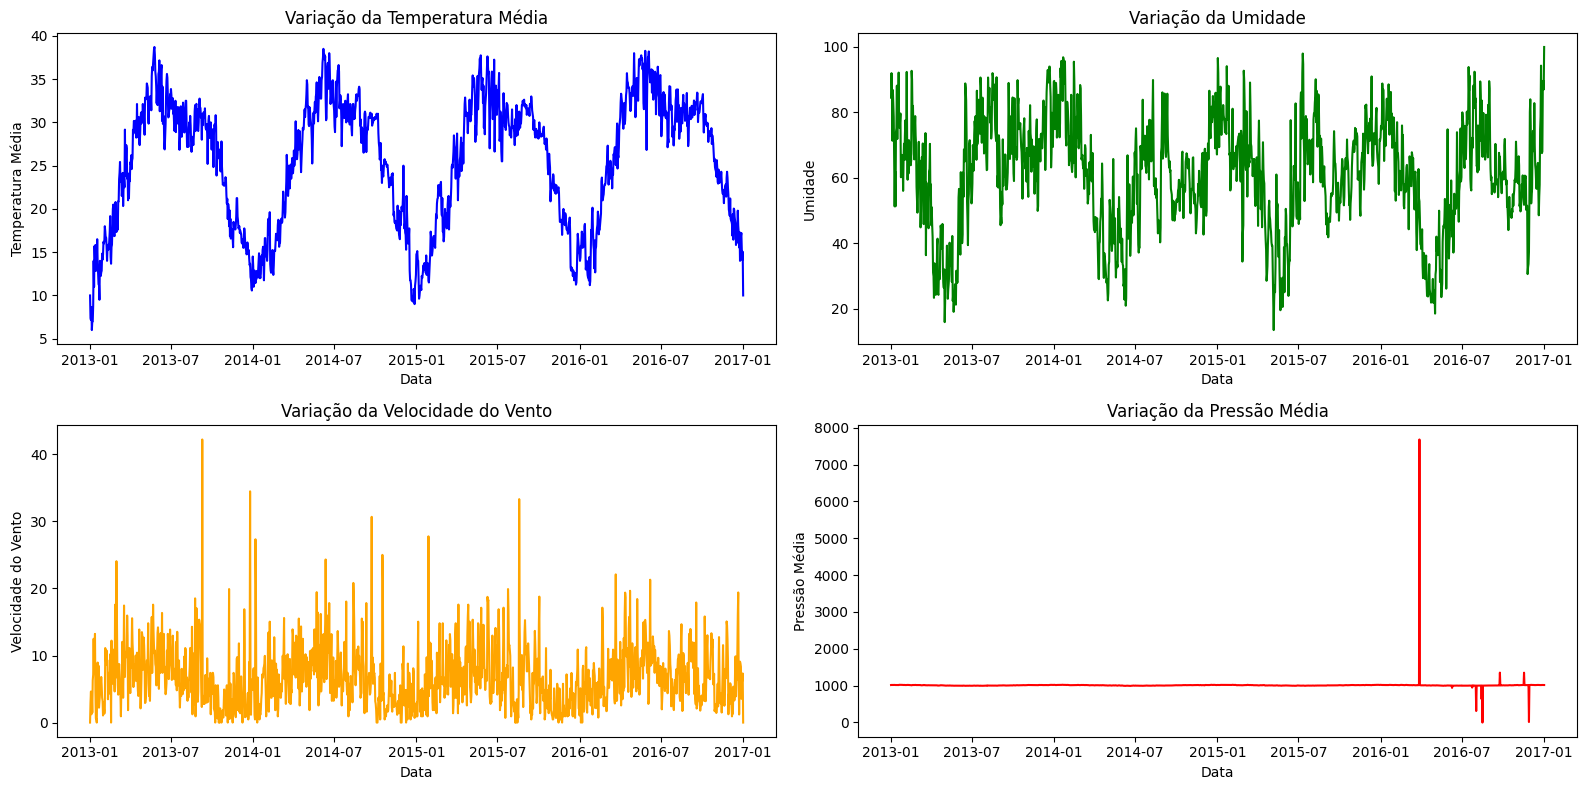

In [11]:
plot_ts(df_train)

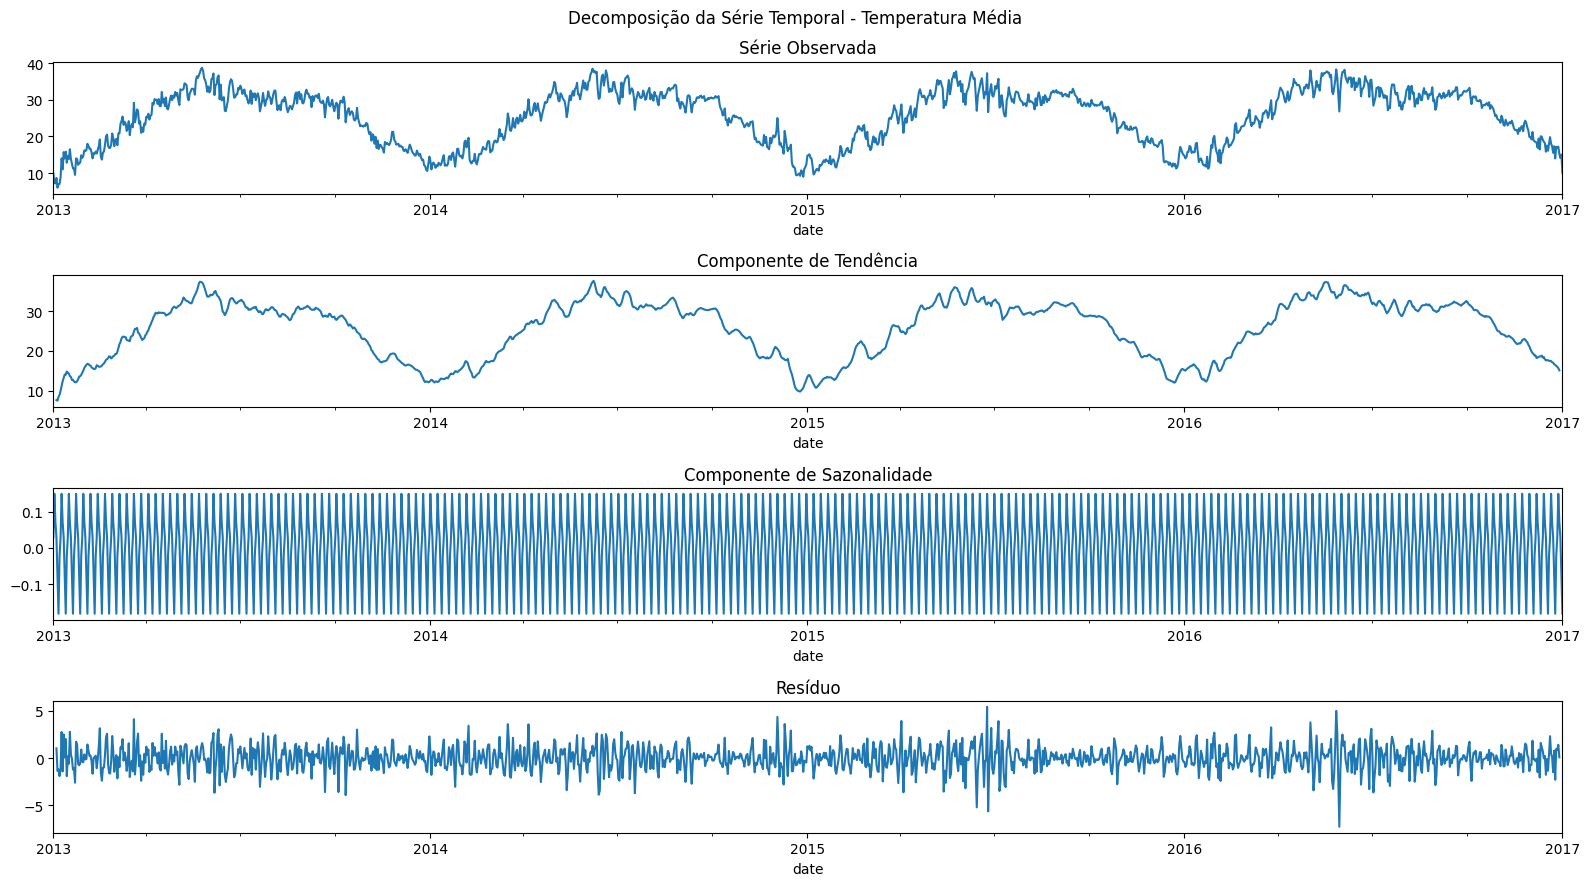

In [12]:
plot_decompose(df_train.meantemp, 'Decomposição da Série Temporal - Temperatura Média')

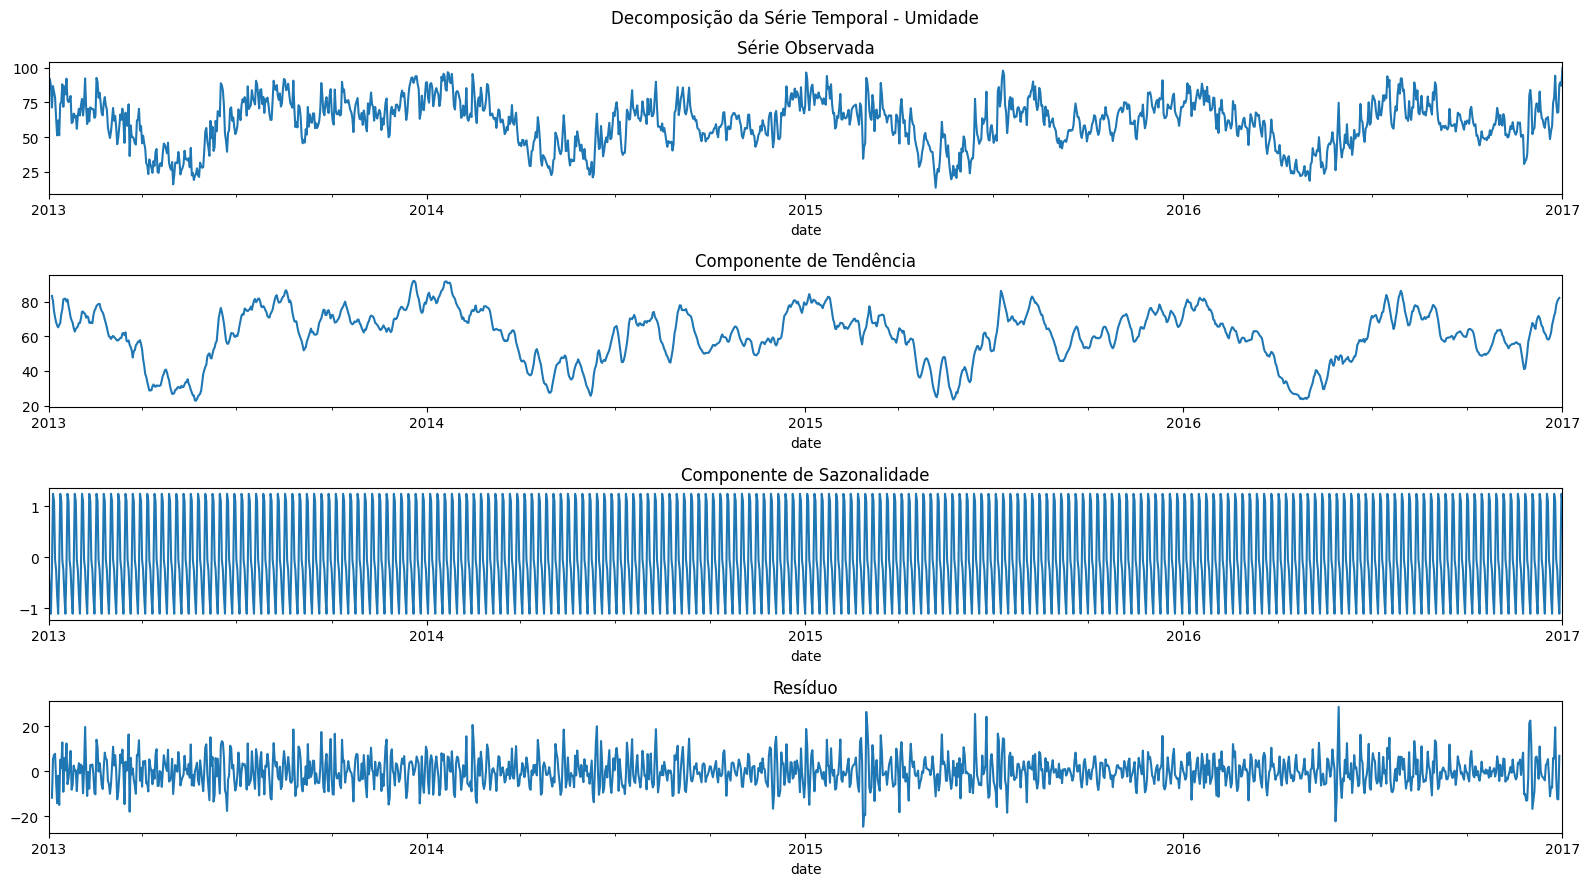

In [13]:
plot_decompose(df_train.humidity, 'Decomposição da Série Temporal - Umidade')

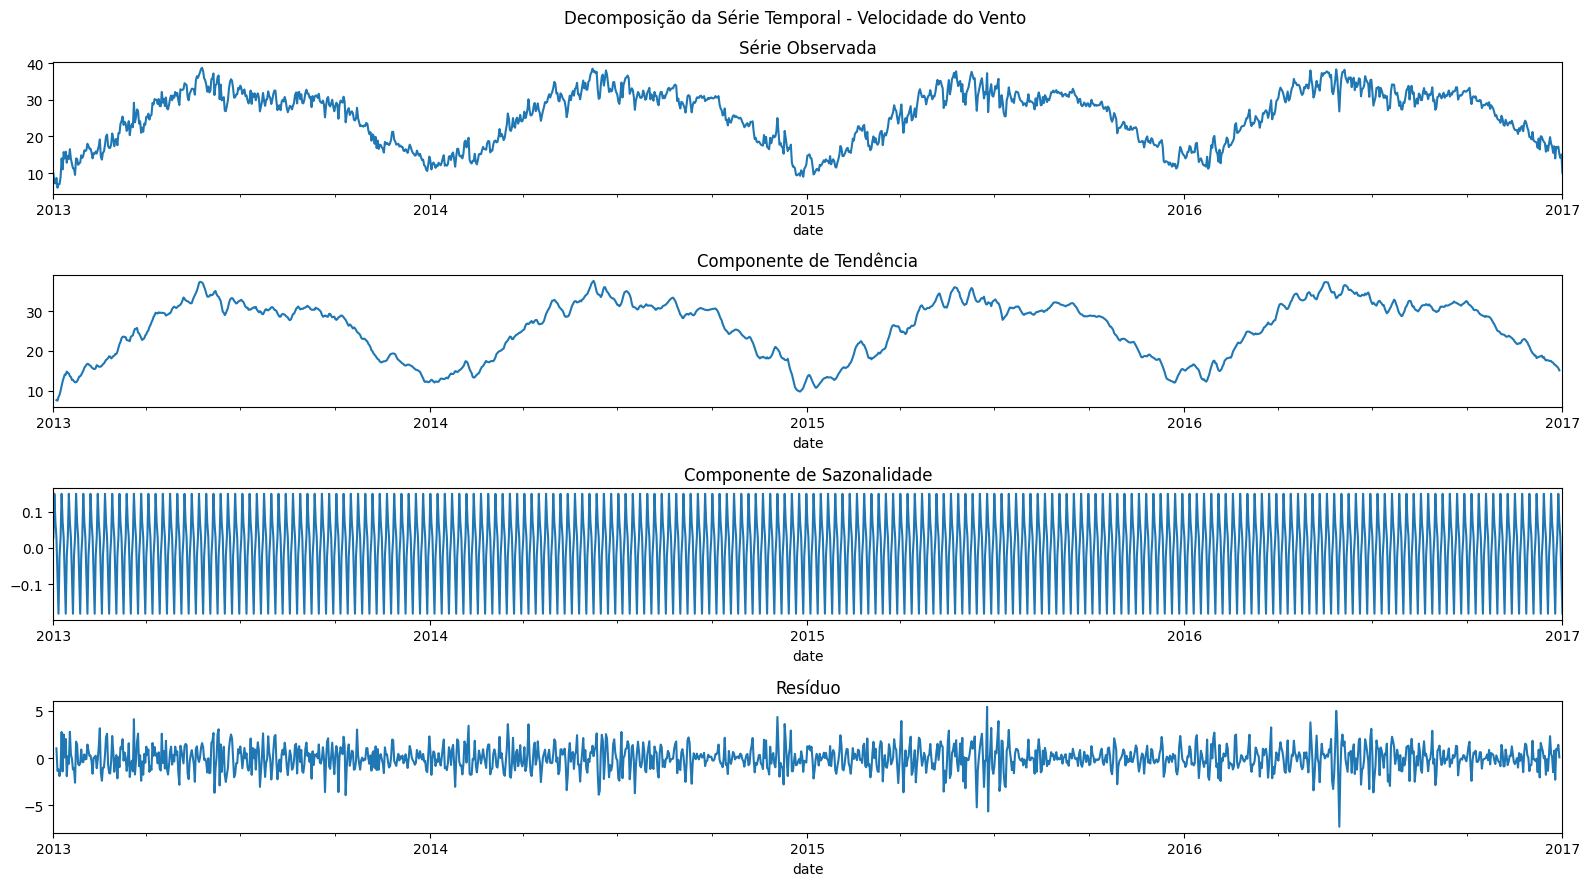

In [14]:
plot_decompose(df_train.meantemp, 'Decomposição da Série Temporal - Velocidade do Vento')

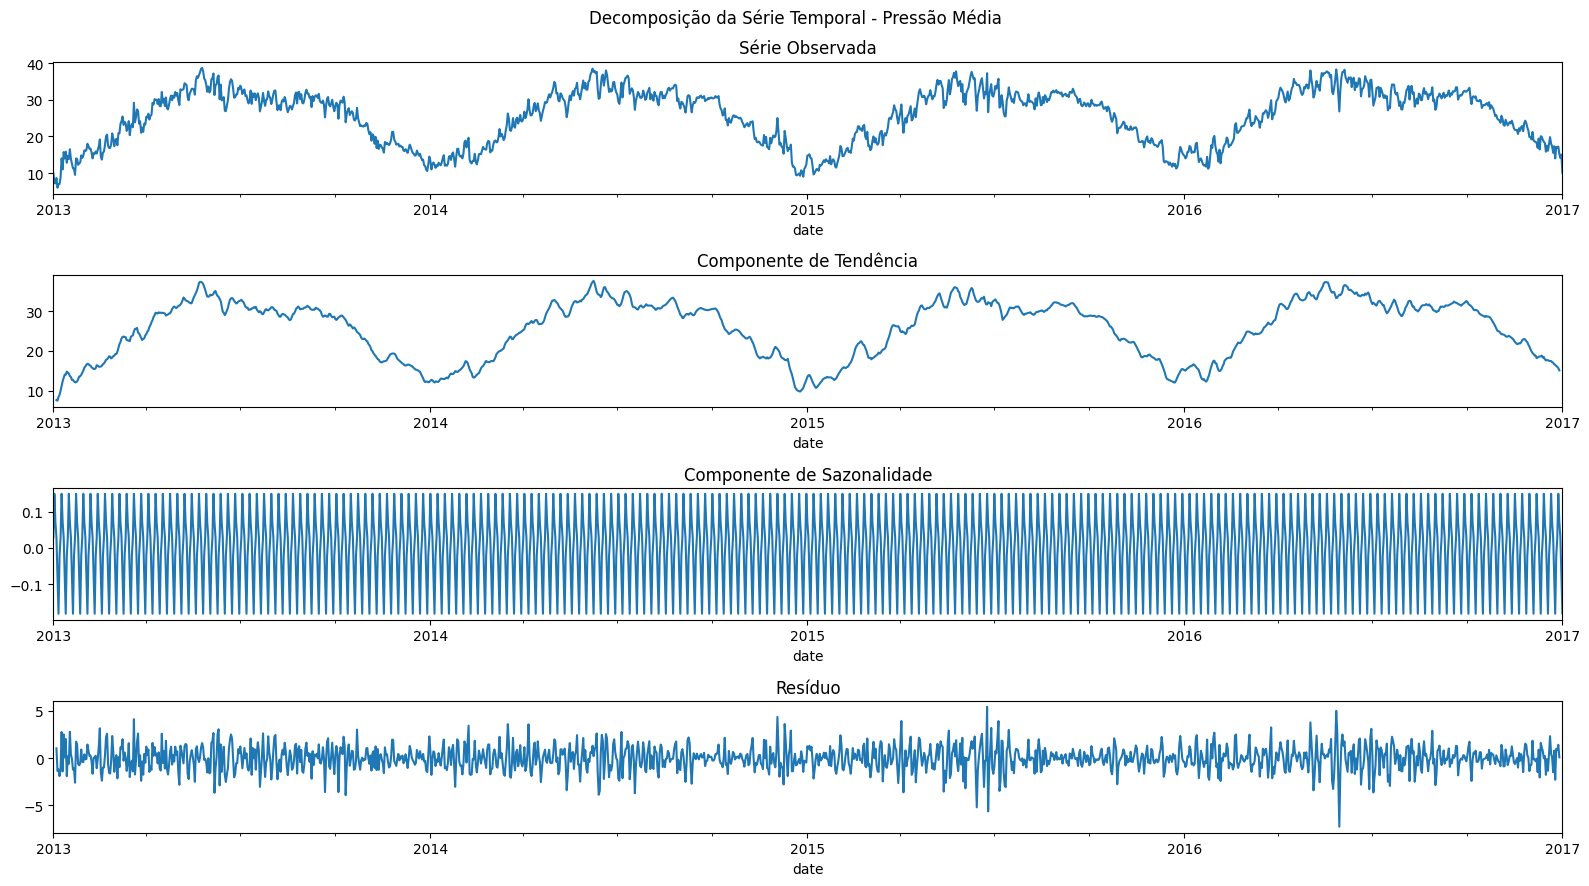

In [15]:
plot_decompose(df_train.meantemp, 'Decomposição da Série Temporal - Pressão Média')

> Hipótese
---
- H0 - Hipótese Nula (não é estacionária) não é estacionaria
- H1 - Hipótese Alternativa (rejeição da hipótese nula) é estacionaria

In [16]:
sns.set_style('darkgrid')

#### Teste Augmented Dickey Fuller (meantemp)

In [17]:
augmented_dickey_fuller(df_train.meantemp.values)

Teste ADf
Teste estatistico: -2.021069055920667
P-Value: 0.2774121372301629
Valores criticos:
	1%: -3.4348647527922824
	5%: -2.863533960720434
	10%: -2.567831568508802


> Resultado
---
- p-value 27% e teste estatístico maior que os valores criticos: Não é estacionaria

#### Teste Augmented Dickey Fuller (humidity)

In [18]:
augmented_dickey_fuller(df_train.humidity.values)

Teste ADf
Teste estatistico: -3.6755769191633383
P-Value: 0.004470100478130771
Valores criticos:
	1%: -3.434880391815318
	5%: -2.8635408625359315
	10%: -2.5678352438452814


> Resultado
---
- p-value 0.005% e teste estatístico menor que os valores criticos: É estacionaria

#### Teste Augmented Dickey Fuller (wind_speed)

In [19]:
augmented_dickey_fuller(df_train.wind_speed.values)

Teste ADf
Teste estatistico: -3.838096756685106
P-Value: 0.0025407221531463936
Valores criticos:
	1%: -3.434908816804013
	5%: -2.863553406963303
	10%: -2.5678419239852994


> Resultado
---
- p-value 0.003% e teste estatístico menor que os valores criticos: É estacionaria

In [20]:
augmented_dickey_fuller(df_train.meanpressure.values)

Teste ADf
Teste estatistico: -38.07859002556162
P-Value: 0.0
Valores criticos:
	1%: -3.434833796443757
	5%: -2.8635202989550756
	10%: -2.567824293398847


p-value 0.0% e teste estatístico menor que os valores criticos: É estacionaria

#### Converter meantemp em estacionária
---
- remover tendencia e sazonalidade, fazer a aproximação(transformada logaritmo e subtrair da média móvel)
- média móvel aplicada a linha da tendencia
- uma janela móvel de tamanho 12 meses é aplicada sobre os dados
- aplicar log
- subtrair a média móvel

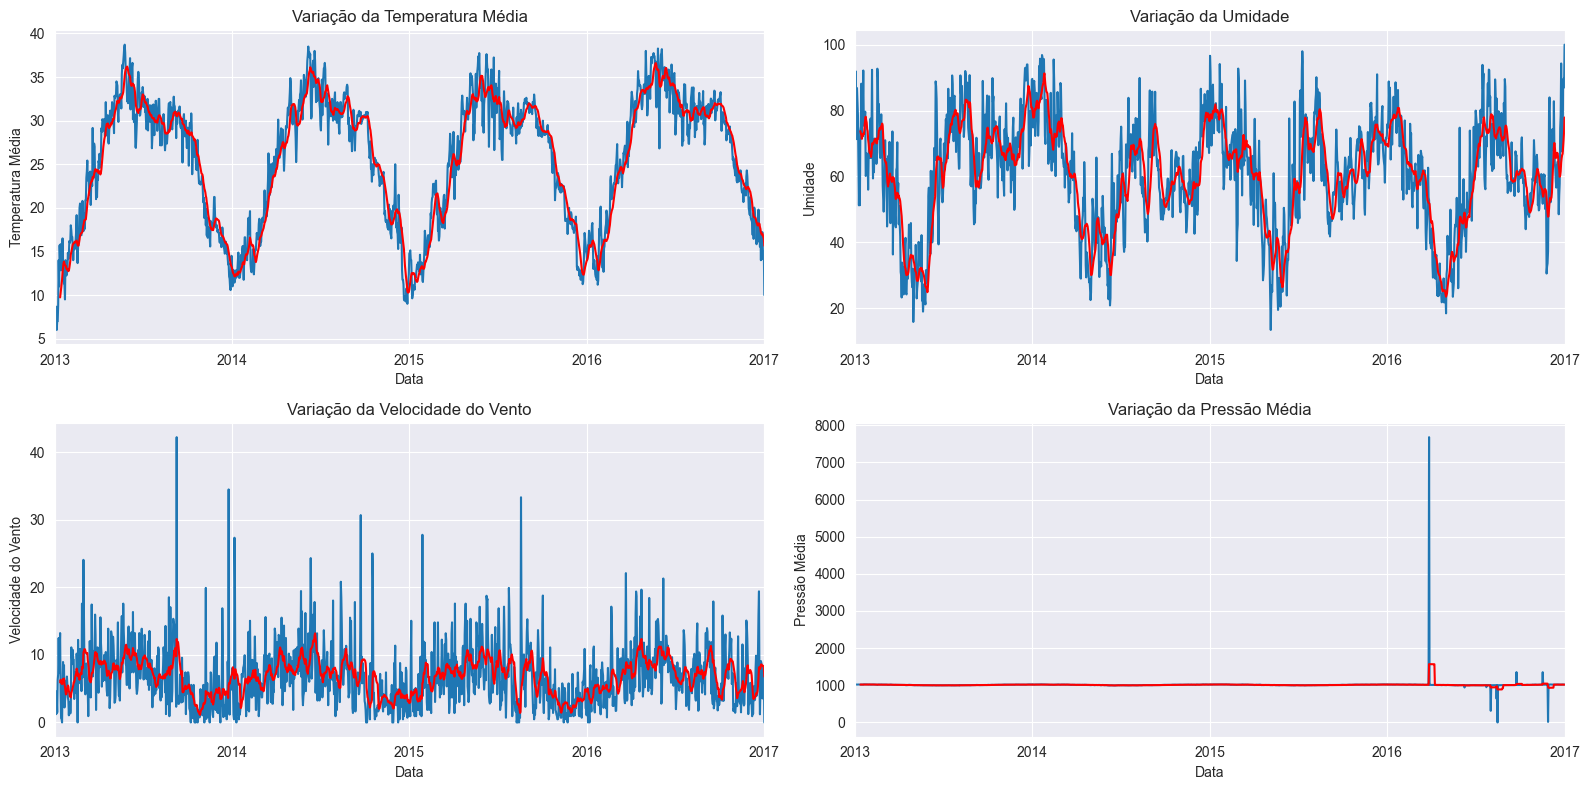

In [21]:
ma = df_train.rolling(12).mean()
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
df_train.meantemp.plot(ax=ax[0][0], legend=False)
ma.meantemp.plot(ax=ax[0][0], legend=False, color='r')
ax[0][0].set_xlabel('Data')
ax[0][0].set_ylabel('Temperatura Média')
ax[0][0].set_title('Variação da Temperatura Média')
df_train.humidity.plot(ax=ax[0][1], legend=False)
ma.humidity.plot(ax=ax[0][1], legend=False, color='r')
ax[0][1].set_xlabel('Data')
ax[0][1].set_ylabel('Umidade')
ax[0][1].set_title('Variação da Umidade')
df_train.wind_speed.plot(ax=ax[1][0], legend=False)
ma.wind_speed.plot(ax=ax[1][0], legend=False, color='r')
ax[1][0].set_xlabel('Data')
ax[1][0].set_ylabel('Velocidade do Vento')
ax[1][0].set_title('Variação da Velocidade do Vento')
df_train.meanpressure.plot(ax=ax[1][1], legend=False)
ma.meanpressure.plot(ax=ax[1][1], legend=False, color='r')
ax[1][1].set_xlabel('Data')
ax[1][1].set_ylabel('Pressão Média')
ax[1][1].set_title('Variação da Pressão Média')
plt.tight_layout()
plt.show()

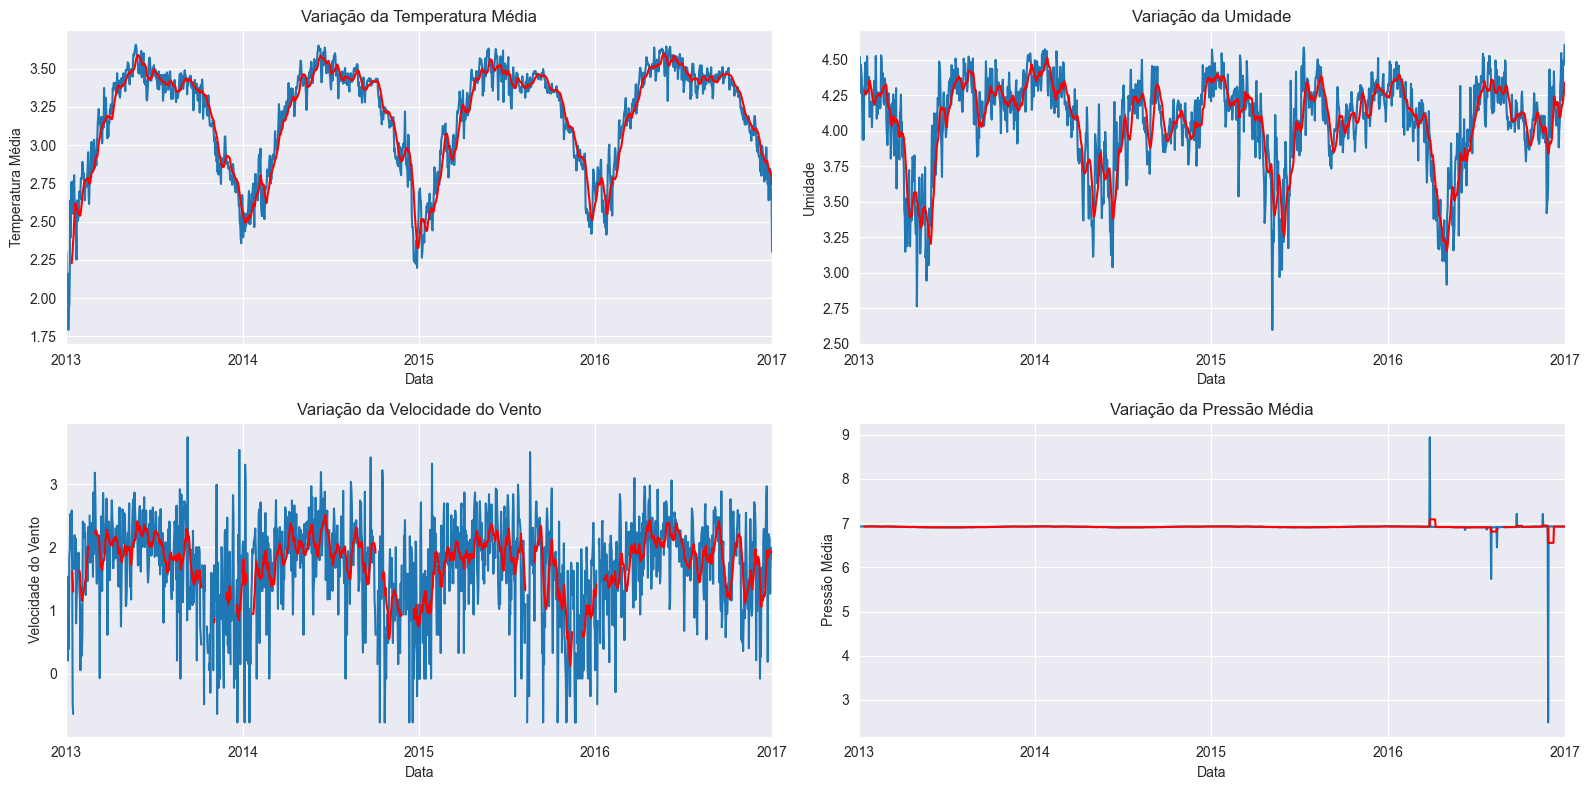

In [22]:
df_log = np.log(df_train)
ma_log = df_log.rolling(12).mean() #type: ignore
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
df_log.meantemp.plot(ax=ax[0][0], legend=False) #type: ignore
ma_log.meantemp.plot(ax=ax[0][0], legend=False, color='r')
ax[0][0].set_xlabel('Data')
ax[0][0].set_ylabel('Temperatura Média')
ax[0][0].set_title('Variação da Temperatura Média')
df_log.humidity.plot(ax=ax[0][1], legend=False) #type: ignore
ma_log.humidity.plot(ax=ax[0][1], legend=False, color='r')
ax[0][1].set_xlabel('Data')
ax[0][1].set_ylabel('Umidade')
ax[0][1].set_title('Variação da Umidade')
df_log.wind_speed.plot(ax=ax[1][0], legend=False) #type: ignore
ma_log.wind_speed.plot(ax=ax[1][0], legend=False, color='r')
ax[1][0].set_xlabel('Data')
ax[1][0].set_ylabel('Velocidade do Vento')
ax[1][0].set_title('Variação da Velocidade do Vento')
df_log.meanpressure.plot(ax=ax[1][1], legend=False) #type: ignore
ma_log.meanpressure.plot(ax=ax[1][1], legend=False, color='r')
ax[1][1].set_xlabel('Data')
ax[1][1].set_ylabel('Pressão Média')
ax[1][1].set_title('Variação da Pressão Média')
plt.tight_layout()
plt.show()

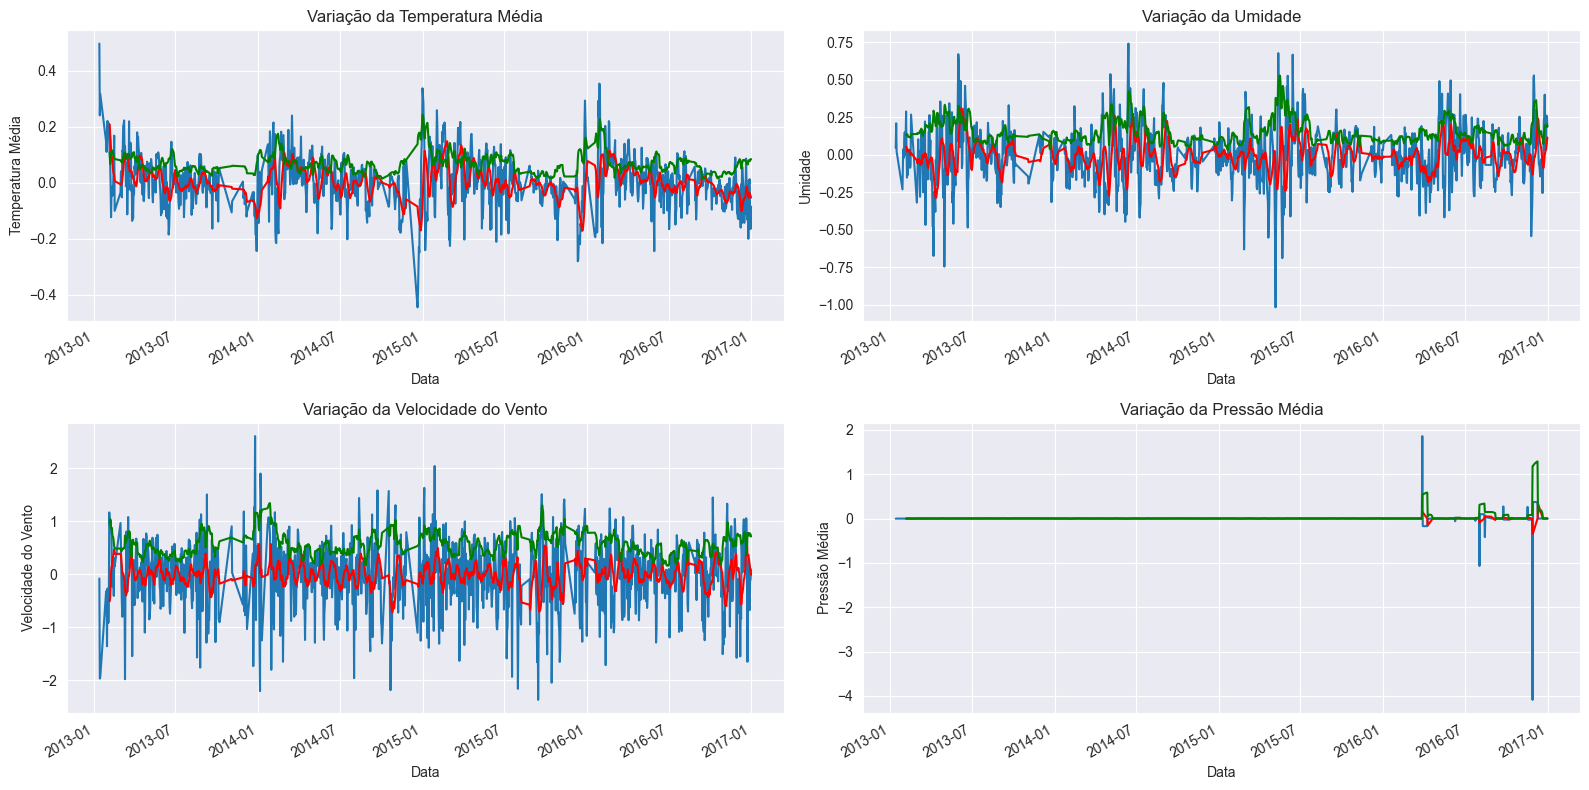

In [23]:
df_sm = (df_log - ma_log).dropna()
ma_sm = df_sm.rolling(12).mean()
std = df_sm.rolling(12).std()
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
df_sm.meantemp.plot(ax=ax[0][0], legend=False)
ma_sm.meantemp.plot(ax=ax[0][0], legend=False, color='r')
std.meantemp.plot(ax=ax[0][0], legend=False, color='g')
ax[0][0].set_xlabel('Data')
ax[0][0].set_ylabel('Temperatura Média')
ax[0][0].set_title('Variação da Temperatura Média')
df_sm.humidity.plot(ax=ax[0][1], legend=False)
ma_sm.humidity.plot(ax=ax[0][1], legend=False, color='r')
std.humidity.plot(ax=ax[0][1], legend=False, color='g')
ax[0][1].set_xlabel('Data')
ax[0][1].set_ylabel('Umidade')
ax[0][1].set_title('Variação da Umidade')
df_sm.wind_speed.plot(ax=ax[1][0], legend=False)
ma_sm.wind_speed.plot(ax=ax[1][0], legend=False, color='r')
std.wind_speed.plot(ax=ax[1][0], legend=False, color='g')
ax[1][0].set_xlabel('Data')
ax[1][0].set_ylabel('Velocidade do Vento')
ax[1][0].set_title('Variação da Velocidade do Vento')
df_sm.meanpressure.plot(ax=ax[1][1], legend=False)
ma_sm.meanpressure.plot(ax=ax[1][1], legend=False, color='r')
std.meanpressure.plot(ax=ax[1][1], legend=False, color='g')
ax[1][1].set_xlabel('Data')
ax[1][1].set_ylabel('Pressão Média')
ax[1][1].set_title('Variação da Pressão Média')
plt.tight_layout()
plt.show()

In [24]:
augmented_dickey_fuller(df_sm.meantemp.values)

Teste ADf
Teste estatistico: -6.6800134977823795
P-Value: 4.366225827851803e-09
Valores criticos:
	1%: -3.4356560275160835
	5%: -2.8638831211270817
	10%: -2.568017509711682


In [25]:
augmented_dickey_fuller(df_sm.humidity.values)

Teste ADf
Teste estatistico: -13.633937762964065
P-Value: 1.7024912661746997e-25
Valores criticos:
	1%: -3.435630320520318
	5%: -2.863871779019612
	10%: -2.56801146937726


In [26]:
augmented_dickey_fuller(df_sm.wind_speed.values)

Teste ADf
Teste estatistico: -12.343726489520217
P-Value: 6.037645231479147e-23
Valores criticos:
	1%: -3.4356646522289815
	5%: -2.863886926389418
	10%: -2.568019536239491


In [27]:
augmented_dickey_fuller(df_sm.meanpressure.values)

Teste ADf
Teste estatistico: -16.10174074944645
P-Value: 5.12287787950171e-29
Valores criticos:
	1%: -3.435638861796935
	5%: -2.863875547501718
	10%: -2.5680134763122906


- Derivadas de um número de polinômio de primeiro grau deixando mais estacionaria.

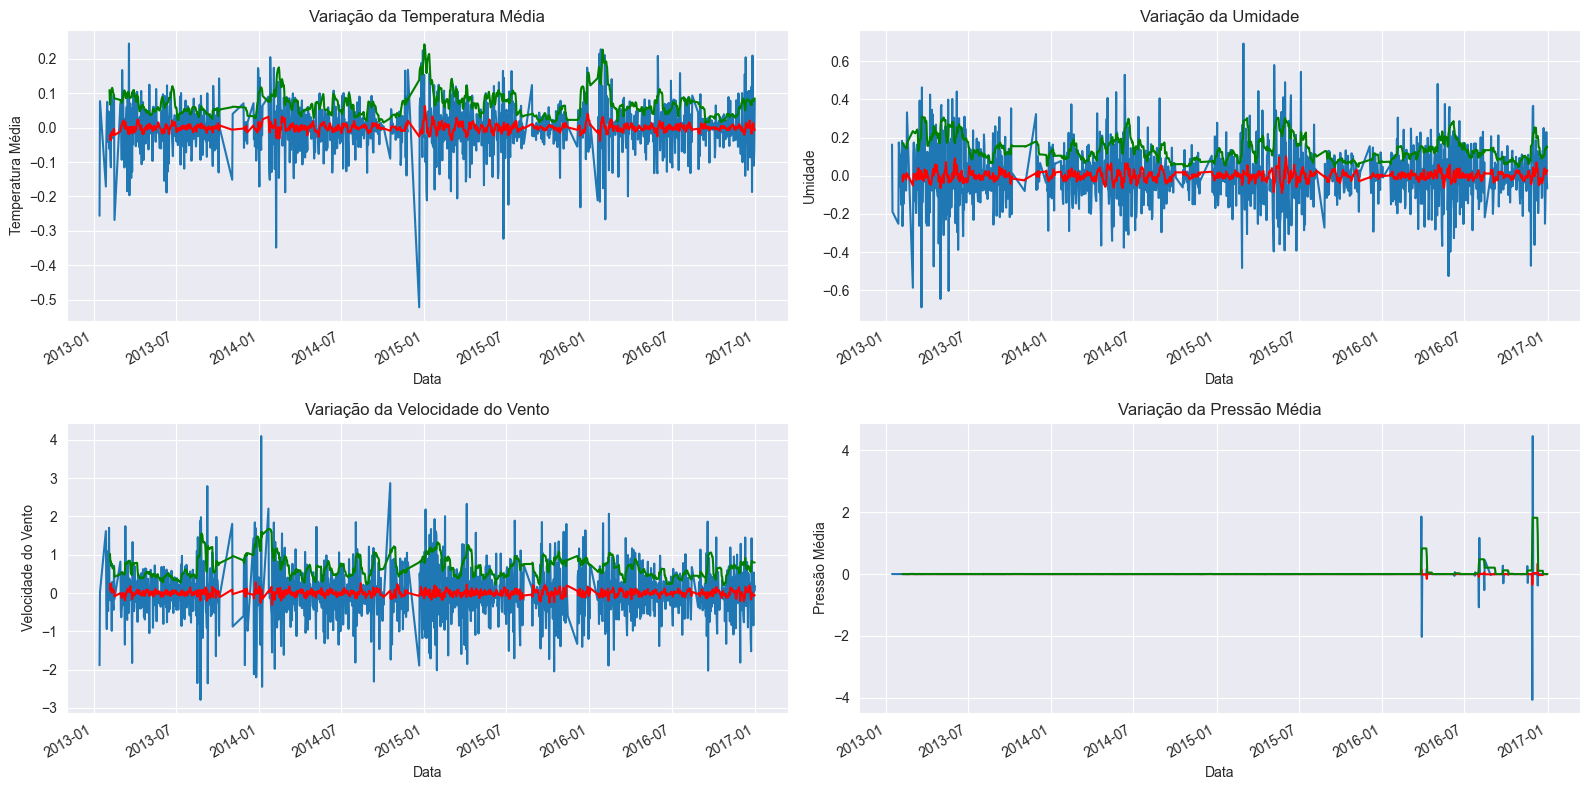

In [28]:
df_diff = df_sm.diff(1)# primeira derivara
ma_diff = df_diff.rolling(12).mean()# 12 meses
std_diff = df_diff.rolling(12).std()# 12 meses
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
df_diff.meantemp.plot(ax=ax[0][0], legend=False)
ma_diff.meantemp.plot(ax=ax[0][0], legend=False, color='r')
std.meantemp.plot(ax=ax[0][0], legend=False, color='g')
ax[0][0].set_xlabel('Data')
ax[0][0].set_ylabel('Temperatura Média')
ax[0][0].set_title('Variação da Temperatura Média')
df_diff.humidity.plot(ax=ax[0][1], legend=False)
ma_diff.humidity.plot(ax=ax[0][1], legend=False, color='r')
std_diff.humidity.plot(ax=ax[0][1], legend=False, color='g')
ax[0][1].set_xlabel('Data')
ax[0][1].set_ylabel('Umidade')
ax[0][1].set_title('Variação da Umidade')
df_diff.wind_speed.plot(ax=ax[1][0], legend=False)
ma_diff.wind_speed.plot(ax=ax[1][0], legend=False, color='r')
std_diff.wind_speed.plot(ax=ax[1][0], legend=False, color='g')
ax[1][0].set_xlabel('Data')
ax[1][0].set_ylabel('Velocidade do Vento')
ax[1][0].set_title('Variação da Velocidade do Vento')
df_diff.meanpressure.plot(ax=ax[1][1], legend=False)
ma_diff.meanpressure.plot(ax=ax[1][1], legend=False, color='r')
std_diff.meanpressure.plot(ax=ax[1][1], legend=False, color='g')
ax[1][1].set_xlabel('Data')
ax[1][1].set_ylabel('Pressão Média')
ax[1][1].set_title('Variação da Pressão Média')
plt.tight_layout()
plt.show()

In [29]:
augmented_dickey_fuller(df_diff.meantemp.dropna().values)

Teste ADf
Teste estatistico: -12.350340960203464
P-Value: 5.844727736839578e-23
Valores criticos:
	1%: -3.4356950607889254
	5%: -2.863900342696613
	10%: -2.568026681232353


In [30]:
augmented_dickey_fuller(df_diff.humidity.dropna().values)

Teste ADf
Teste estatistico: -12.9419177957572
P-Value: 3.520049025797706e-24
Valores criticos:
	1%: -3.4356950607889254
	5%: -2.863900342696613
	10%: -2.568026681232353


In [31]:
augmented_dickey_fuller(df_diff.wind_speed.dropna().values)

Teste ADf
Teste estatistico: -14.81021102674028
P-Value: 2.035853960458818e-27
Valores criticos:
	1%: -3.435699433298302
	5%: -2.863902271843875
	10%: -2.5680277086214076


In [32]:
augmented_dickey_fuller(df_diff.meanpressure.dropna().values)

Teste ADf
Teste estatistico: -14.182832190335679
P-Value: 1.9153228226878285e-26
Valores criticos:
	1%: -3.435699433298302
	5%: -2.863902271843875
	10%: -2.5680277086214076


p-value negativo e teste estatístico menor que os valores criticos: meantemp é estacionaria

- Aplicar a transformada de Fourier para teste

#### ARIMA
- AR: Autorregressivo
-  I: Integrado
-  MA: Moving Average-Media Móvel

> A(x, y, z) - ACF, PACF

> ACF autocorrelação em uma variável, período correlacionado com outro, correlação direta e indireta

> PACF autocorrelação parcial, correlação direta
---
- 5% ACF
- 1.96/sqrt(N-d) -> N número de pontos do dataframe e d é o número de vezes qeu nos diferenciamos o dataframe

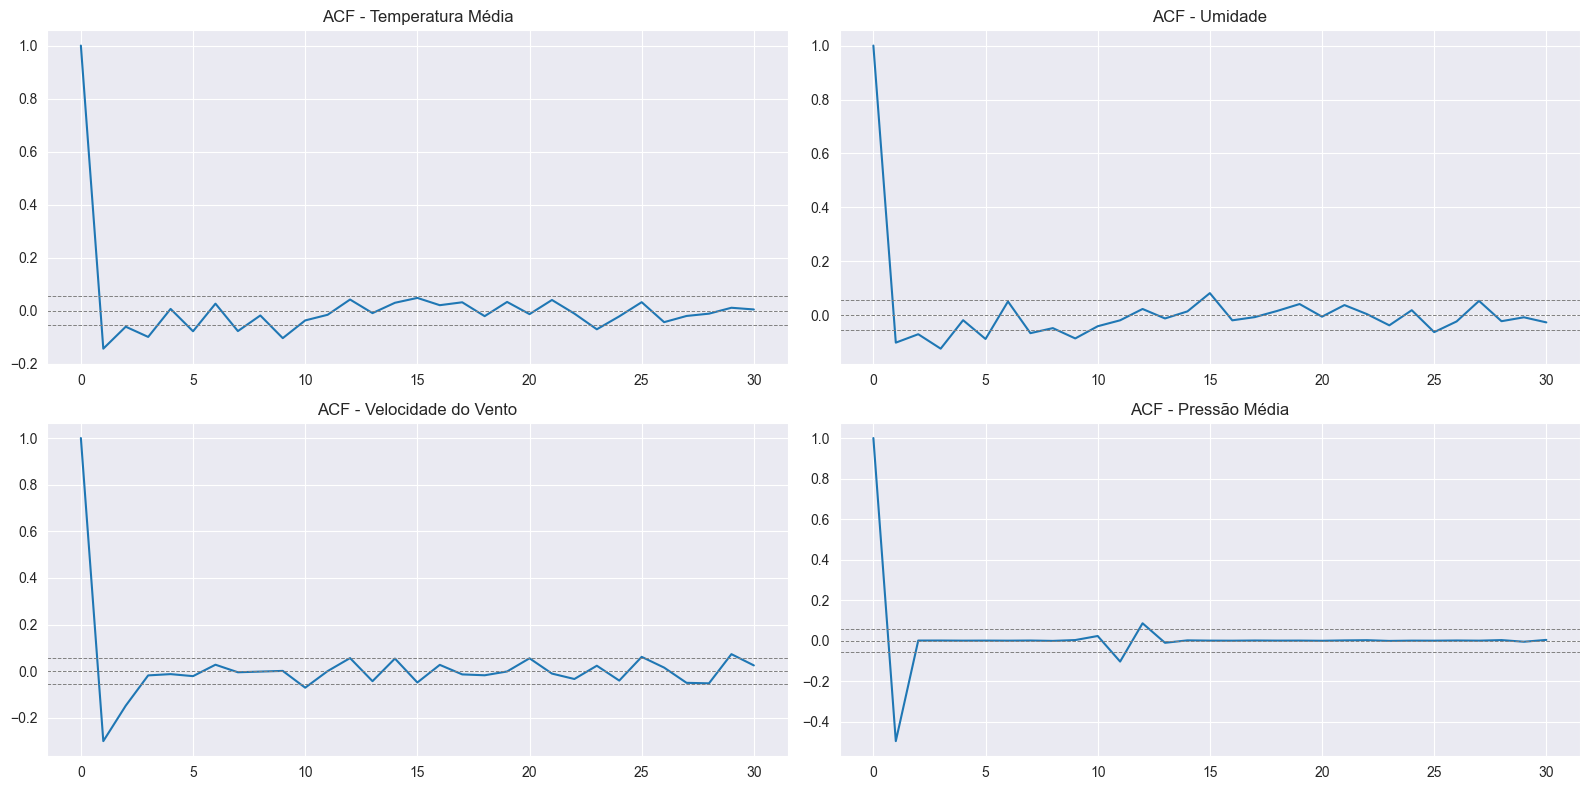

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
ax[0][0].plot(autocorrelation_function(df_diff.meantemp, 30))
ax[0][0].axhline(y=-1.96/(np.sqrt((len(df_diff.meantemp) -1))), linestyle='--', color='gray', linewidth=0.7)
ax[0][0].axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
ax[0][0].axhline(y=1.96/(np.sqrt((len(df_diff.meantemp) -1))), linestyle='--', color='gray', linewidth=0.7)
ax[0][0].set_title('ACF - Temperatura Média')
ax[0][1].plot(autocorrelation_function(df_diff.humidity, 30))
ax[0][1].axhline(y=-1.96/(np.sqrt((len(df_diff.humidity) -1))), linestyle='--', color='gray', linewidth=0.7)
ax[0][1].axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
ax[0][1].axhline(y=1.96/(np.sqrt((len(df_diff.humidity) -1))), linestyle='--', color='gray', linewidth=0.7)
ax[0][1].set_title('ACF - Umidade')
ax[1][0].plot(autocorrelation_function(df_diff.wind_speed, 30))
ax[1][0].axhline(y=-1.96/(np.sqrt((len(df_diff.wind_speed) -1))), linestyle='--', color='gray', linewidth=0.7)
ax[1][0].axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
ax[1][0].axhline(y=1.96/(np.sqrt((len(df_diff.wind_speed) -1))), linestyle='--', color='gray', linewidth=0.7)
ax[1][0].set_title('ACF - Velocidade do Vento')
ax[1][1].plot(autocorrelation_function(df_diff.meanpressure, 30))
ax[1][1].axhline(y=-1.96/(np.sqrt((len(df_diff.meanpressure) -1))), linestyle='--', color='gray', linewidth=0.7)
ax[1][1].axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
ax[1][1].axhline(y=1.96/(np.sqrt((len(df_diff.meanpressure) -1))), linestyle='--', color='gray', linewidth=0.7)
ax[1][1].set_title('ACF - Pressão Média')
plt.tight_layout()
plt.show()

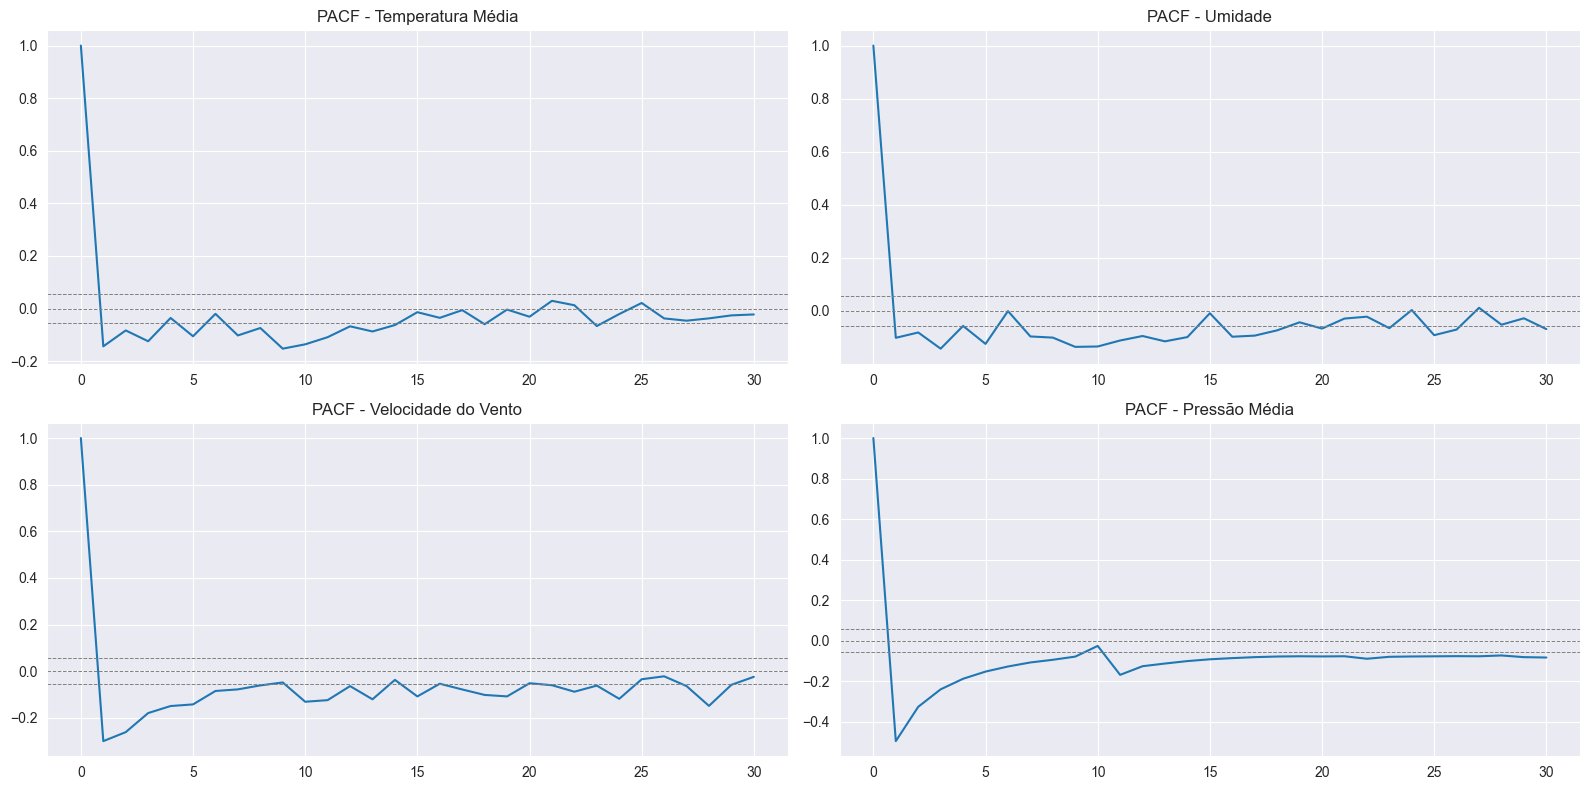

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
ax[0][0].plot(partial_autocorrelation_function(df_diff.meantemp, 30))
ax[0][0].axhline(y=-1.96/(np.sqrt((len(df_diff.meantemp) -1))), linestyle='--', color='gray', linewidth=0.7)
ax[0][0].axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
ax[0][0].axhline(y=1.96/(np.sqrt((len(df_diff.meantemp) -1))), linestyle='--', color='gray', linewidth=0.7)
ax[0][0].set_title('PACF - Temperatura Média')
ax[0][1].plot(partial_autocorrelation_function(df_diff.humidity, 30))
ax[0][1].axhline(y=-1.96/(np.sqrt((len(df_diff.humidity) -1))), linestyle='--', color='gray', linewidth=0.7)
ax[0][1].axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
ax[0][1].axhline(y=1.96/(np.sqrt((len(df_diff.humidity) -1))), linestyle='--', color='gray', linewidth=0.7)
ax[0][1].set_title('PACF - Umidade')
ax[1][0].plot(partial_autocorrelation_function(df_diff.wind_speed, 30))
ax[1][0].axhline(y=-1.96/(np.sqrt((len(df_diff.wind_speed) -1))), linestyle='--', color='gray', linewidth=0.7)
ax[1][0].axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
ax[1][0].axhline(y=1.96/(np.sqrt((len(df_diff.wind_speed) -1))), linestyle='--', color='gray', linewidth=0.7)
ax[1][0].set_title('PACF - Velocidade do Vento')
ax[1][1].plot(partial_autocorrelation_function(df_diff.meanpressure, 30))
ax[1][1].axhline(y=-1.96/(np.sqrt((len(df_diff.meanpressure) -1))), linestyle='--', color='gray', linewidth=0.7)
ax[1][1].axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
ax[1][1].axhline(y=1.96/(np.sqrt((len(df_diff.meanpressure) -1))), linestyle='--', color='gray', linewidth=0.7)
ax[1][1].set_title('PACF - Pressão Média')
plt.tight_layout()
plt.show()

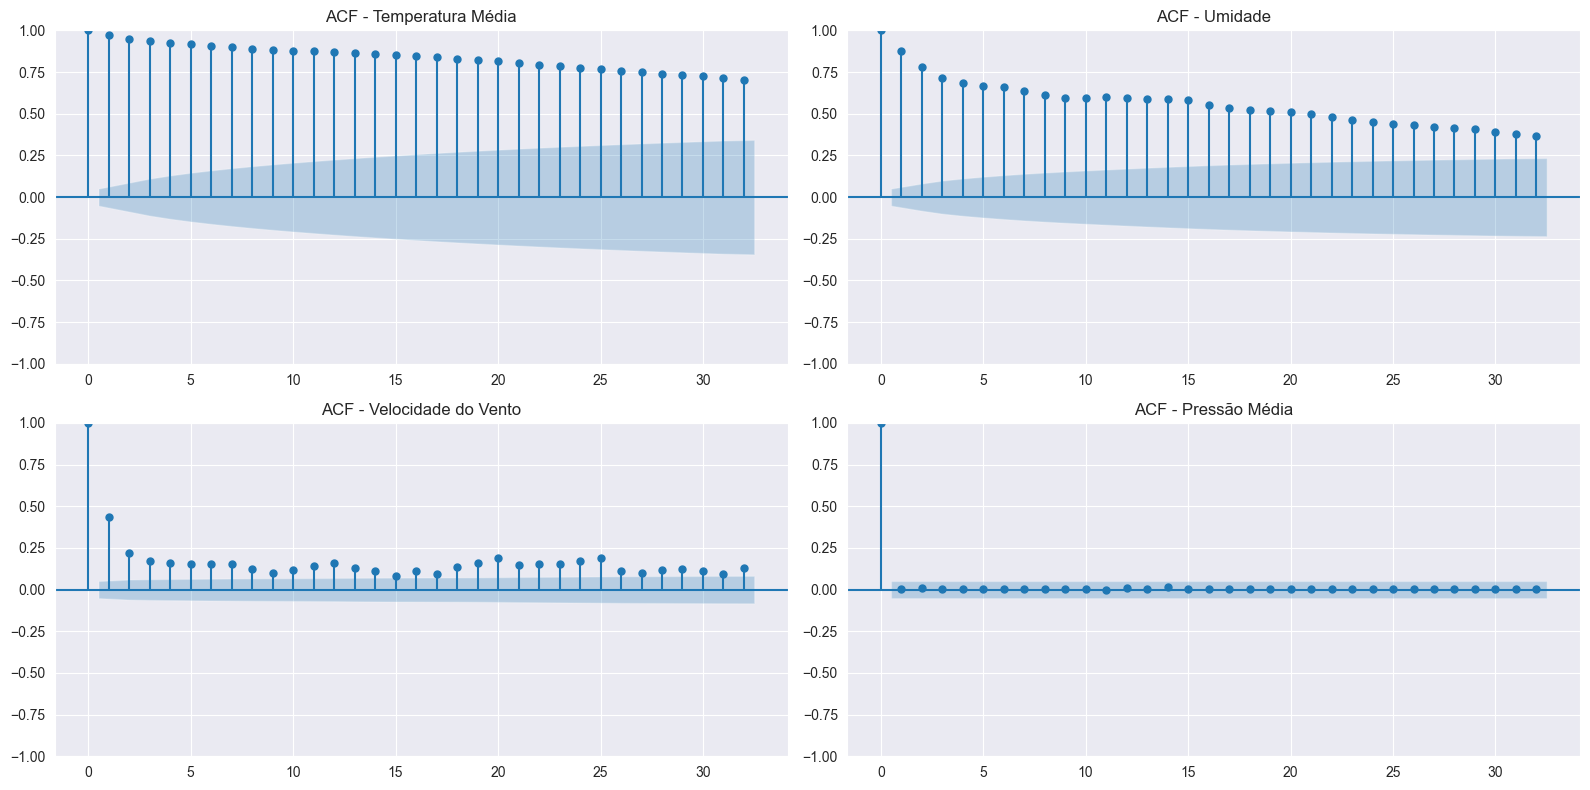

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
plot_acf(df_train.meantemp, ax=ax[0][0])
ax[0][0].set_title('ACF - Temperatura Média')
plot_acf(df_train.humidity, ax=ax[0][1])
ax[0][1].set_title('ACF - Umidade')
plot_acf(df_train.wind_speed, ax=ax[1][0])
ax[1][0].set_title('ACF - Velocidade do Vento')
plot_acf(df_train.meanpressure, ax=ax[1][1])
ax[1][1].set_title('ACF - Pressão Média')
plt.tight_layout()
plt.show()

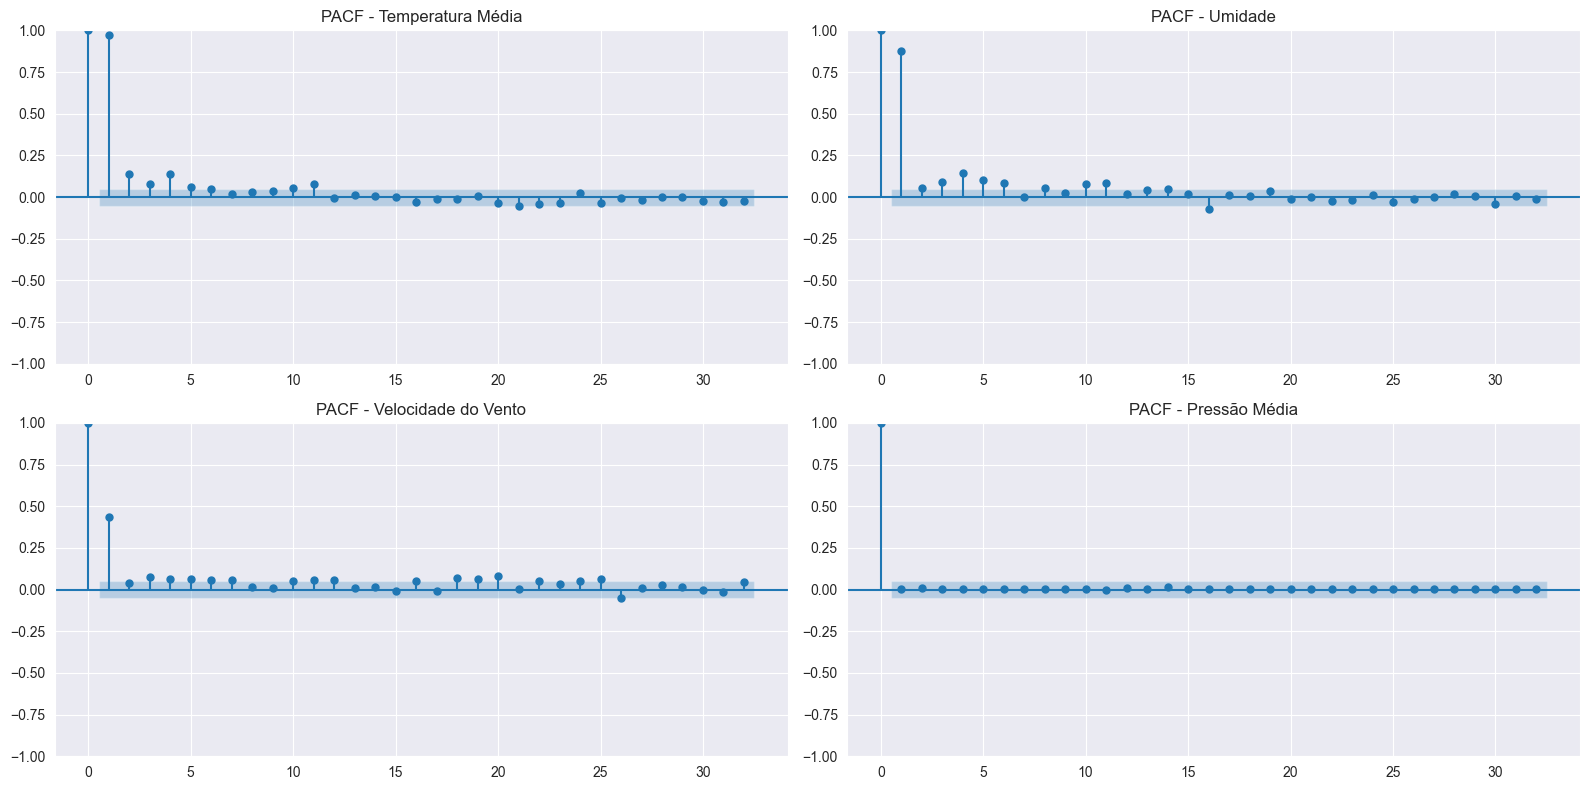

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
plot_pacf(df_train.meantemp, ax=ax[0][0])
ax[0][0].set_title('PACF - Temperatura Média')
plot_pacf(df_train.humidity, ax=ax[0][1])
ax[0][1].set_title('PACF - Umidade')
plot_pacf(df_train.wind_speed, ax=ax[1][0])
ax[1][0].set_title('PACF - Velocidade do Vento')
plot_pacf(df_train.meanpressure, ax=ax[1][1])
ax[1][1].set_title('PACF - Pressão Média')
plt.tight_layout()
plt.show()

## Construção do modelo

In [37]:
train = pd.read_csv('Data/DailyDelhiClimateTrain.csv', parse_dates=[0])
train = pd.melt(train, id_vars=['date'], var_name='unique_id', value_name='y')
train.rename(columns={'date': 'ds'}, inplace=True)
train.head()

,ds,unique_id,y
0,2013-01-01,meantemp,10.000000
1,2013-01-02,meantemp,7.400000
2,2013-01-03,meantemp,7.166667
3,2013-01-04,meantemp,8.666667
4,2013-01-05,meantemp,6.000000


In [38]:
test = pd.read_csv('Data/DailyDelhiClimateTest.csv', parse_dates=[0])
test = pd.melt(test, id_vars=['date'], var_name='unique_id', value_name='y')
test.rename(columns={'date': 'ds'}, inplace=True)
test.head()

,ds,unique_id,y
0,2017-01-01,meantemp,15.913043
1,2017-01-02,meantemp,18.500000
2,2017-01-03,meantemp,17.111111
3,2017-01-04,meantemp,18.700000
4,2017-01-05,meantemp,18.388889


In [39]:
h = test['ds'].nunique()
h

114

##### Baseline Naive
- Faz a previsão com base no último dia da série.

In [40]:
bl_model_n = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
bl_model_n.fit(train)
forecast_n = bl_model_n.predict(h=h, level=[95])
forecast_n = forecast_n.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_n.dropna(inplace=True)

wmape = wmap_error(forecast_n['y'].values, forecast_n['Naive'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) Naive: {wmape:.2%}")
rmse = rmse_error(forecast_n['y'], forecast_n['Naive'])
print(f"RMSE (Root Mean Square Error) Naive: {round(rmse, 2)}")
mae = mae_error(forecast_n['y'], forecast_n['Naive'])
print(f"MAE (Mean Absolute Error) Naive: {round(mae, 2)}")
mse = mse_error(forecast_n['y'], forecast_n['Naive'])
print(f"MSE (Mean Squared Error) Naive: {round(mse, 2)}")
print("")

crossvalidation_n = bl_model_n.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_n['y'].values, crossvalidation_n['Naive'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation Naive: {wmape:.2%}")
rmse = rmse_error(crossvalidation_n['y'], crossvalidation_n['Naive'])
print(f"RMSE (Root Mean Square Error) cross-validation Naive: {round(rmse, 2)}")
mae = mae_error(crossvalidation_n['y'], crossvalidation_n['Naive'])
print(f"MAE (Mean Absolute Error) cross-validation Naive: {round(mae, 2)}")
mse = mse_error(crossvalidation_n['y'], crossvalidation_n['Naive'])
print(f"MSE (Mean Squared Error) cross-validation Naive: {round(mse, 2)}")

# bl_model_n.plot(
#     train,
#     forecast_n,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) Naive: 6.30%
RMSE (Root Mean Square Error) Naive: 25.47
MAE (Mean Absolute Error) Naive: 17.3
MSE (Mean Squared Error) Naive: 648.91



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation Naive: 4.46%
RMSE (Root Mean Square Error) cross-validation Naive: 140.24000549316406
MAE (Mean Absolute Error) cross-validation Naive: 12.350000381469727
MSE (Mean Squared Error) cross-validation Naive: 19666.80078125


##### Baseline Naive com sazonalidade

In [41]:
bl_model_sn = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
bl_model_sn.fit(train)
forecast_sn = bl_model_sn.predict(h=h, level=[95])
forecast_sn = forecast_sn.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_sn.dropna(inplace=True)

wmape = wmap_error(forecast_sn['y'].values, forecast_sn['SeasonalNaive'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) SeasonalNaive: {wmape:.2%}")
rmse = rmse_error(forecast_sn['y'], forecast_sn['SeasonalNaive'])
print(f"RMSE (Root Mean Square Error) SeasonalNaive: {round(rmse, 2)}")
mae = mae_error(forecast_sn['y'], forecast_sn['SeasonalNaive'])
print(f"MAE (Mean Absolute Error) SeasonalNaive: {round(mae, 2)}")
mse = mse_error(forecast_sn['y'], forecast_sn['SeasonalNaive'])
print(f"MSE (Mean Squared Error) SeasonalNaive: {round(mse, 2)}")
print("")

crossvalidation_sn = bl_model_sn.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_sn['y'].values, crossvalidation_sn['SeasonalNaive'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation SeasonalNaive: {wmape:.2%}")
rmse = rmse_error(crossvalidation_sn['y'], crossvalidation_sn['SeasonalNaive'])
print(f"RMSE (Root Mean Square Error) cross-validation SeasonalNaive: {round(rmse, 2)}")
mae = mae_error(crossvalidation_sn['y'], crossvalidation_sn['SeasonalNaive'])
print(f"MAE (Mean Absolute Error) cross-validation SeasonalNaive: {round(mae, 2)}")
mse = mse_error(crossvalidation_sn['y'], crossvalidation_sn['SeasonalNaive'])
print(f"MSE (Mean Squared Error) cross-validation SeasonalNaive: {round(mse, 2)}")

# bl_model_sn.plot(
#     train,
#     forecast_sn,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) SeasonalNaive: 4.07%
RMSE (Root Mean Square Error) SeasonalNaive: 18.24
MAE (Mean Absolute Error) SeasonalNaive: 11.19
MSE (Mean Squared Error) SeasonalNaive: 332.59



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation SeasonalNaive: 4.71%
RMSE (Root Mean Square Error) cross-validation SeasonalNaive: 140.2899932861328
MAE (Mean Absolute Error) cross-validation SeasonalNaive: 13.050000190734863
MSE (Mean Squared Error) cross-validation SeasonalNaive: 19680.619140625


##### Baseline com janela de sazonalidade

In [45]:
bl_model_swa = StatsForecast(models=[SeasonalWindowAverage(season_length=7, window_size=4)], freq='D', n_jobs=-1)
bl_model_swa.fit(train)
forecast_swa = bl_model_swa.predict(h=h, level=[95])
forecast_swa = forecast_swa.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_swa.dropna(inplace=True)

wmape = wmap_error(forecast_swa['y'].values, forecast_swa['SeasWA'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) SeasWA: {wmape:.2%}")
rmse = rmse_error(forecast_swa['y'], forecast_swa['SeasWA'])
print(f"RMSE (Root Mean Square Error) SeasWA: {round(rmse, 2)}")
mae = mae_error(forecast_swa['y'], forecast_swa['SeasWA'])
print(f"MAE (Mean Absolute Error) SeasWA: {round(mae, 2)}")
mse = mse_error(forecast_swa['y'], forecast_swa['SeasWA'])
print(f"MSE (Mean Squared Error) SeasWA: {round(mse, 2)}")
print("")

crossvalidation_swa = bl_model_swa.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_swa['y'].values, crossvalidation_swa['SeasWA'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation SeasWA: {wmape:.2%}")
rmse = rmse_error(crossvalidation_swa['y'], crossvalidation_swa['SeasWA'])
print(f"RMSE (Root Mean Square Error) cross-validation SeasWA: {round(rmse, 2)}")
mae = mae_error(crossvalidation_swa['y'], crossvalidation_swa['SeasWA'])
print(f"MAE (Mean Absolute Error) cross-validation SeasWA: {round(mae, 2)}")
mse = mse_error(crossvalidation_swa['y'], crossvalidation_swa['SeasWA'])
print(f"MSE (Mean Squared Error) cross-validation SeasWA: {round(mse, 2)}")

# bl_model_swa.plot(
#     train,
#     forecast_swa,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) SeasWA: 3.12%
RMSE (Root Mean Square Error) SeasWA: 13.57
MAE (Mean Absolute Error) SeasWA: 8.58
MSE (Mean Squared Error) SeasWA: 184.23



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation SeasWA: 6.09%
RMSE (Root Mean Square Error) cross-validation SeasWA: 156.5800018310547
MAE (Mean Absolute Error) cross-validation SeasWA: 16.8700008392334
MSE (Mean Squared Error) cross-validation SeasWA: 24517.23046875


##### Baseline com janela

In [46]:
bl_model_wa = StatsForecast(models=[WindowAverage(window_size=30)], freq='D', n_jobs=-1)
bl_model_wa.fit(train)
forecast_wa = bl_model_wa.predict(h=h, level=[95])
forecast_wa = forecast_wa.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_wa.dropna(inplace=True)

wmape = wmap_error(forecast_wa['y'].values, forecast_wa['WindowAverage'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) WindowAverage: {wmape:.2%}")
rmse = rmse_error(forecast_wa['y'], forecast_wa['WindowAverage'])
print(f"RMSE (Root Mean Square Error) WindowAverage: {round(rmse, 2)}")
mae = mae_error(forecast_wa['y'], forecast_wa['WindowAverage'])
print(f"MAE (Mean Absolute Error) WindowAverage: {round(mae, 2)}")
mse = mse_error(forecast_wa['y'], forecast_wa['WindowAverage'])
print(f"MSE (Mean Squared Error) WindowAverage: {round(mse, 2)}")
print("")

crossvalidation_wa = bl_model_wa.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_wa['y'].values, crossvalidation_wa['WindowAverage'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation WindowAverage: {wmape:.2%}")
rmse = rmse_error(crossvalidation_wa['y'], crossvalidation_wa['WindowAverage'])
print(f"RMSE (Root Mean Square Error) cross-validation WindowAverage: {round(rmse, 2)}")
mae = mae_error(crossvalidation_wa['y'], crossvalidation_wa['WindowAverage'])
print(f"MAE (Mean Absolute Error) cross-validation WindowAverage: {round(mae, 2)}")
mse = mse_error(crossvalidation_wa['y'], crossvalidation_wa['WindowAverage'])
print(f"MSE (Mean Squared Error) cross-validation WindowAverage: {round(mse, 2)}")

# bl_model_wa.plot(
#     train,
#     forecast_wa,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) WindowAverage: 2.95%
RMSE (Root Mean Square Error) WindowAverage: 12.77
MAE (Mean Absolute Error) WindowAverage: 8.11
MSE (Mean Squared Error) WindowAverage: 163.14



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation WindowAverage: 5.99%
RMSE (Root Mean Square Error) cross-validation WindowAverage: 142.77999877929688
MAE (Mean Absolute Error) cross-validation WindowAverage: 16.59000015258789
MSE (Mean Squared Error) cross-validation WindowAverage: 20387.48046875


##### Baseline com desvio

In [47]:
bl_model_rwwd = StatsForecast(models=[RandomWalkWithDrift()], freq='D', n_jobs=-1)
bl_model_rwwd.fit(train)
forecast_rwwd = bl_model_rwwd.predict(h=h, level=[95])
forecast_rwwd = forecast_rwwd.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_rwwd.dropna(inplace=True)

wmape = wmap_error(forecast_rwwd['y'].values, forecast_rwwd['RWD'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) RWD: {wmape:.2%}")
rmse = rmse_error(forecast_rwwd['y'], forecast_rwwd['RWD'])
print(f"RMSE (Root Mean Square Error) RWD: {round(rmse, 2)}")
mae = mae_error(forecast_rwwd['y'], forecast_rwwd['RWD'])
print(f"MAE (Mean Absolute Error) RWD: {round(mae, 2)}")
mse = mse_error(forecast_rwwd['y'], forecast_rwwd['RWD'])
print(f"MSE (Mean Squared Error) RWD: {round(mse, 2)}")
print("")

crossvalidation_rwwd = bl_model_rwwd.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_rwwd['y'].values, crossvalidation_rwwd['RWD'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation RWD: {wmape:.2%}")
rmse = rmse_error(crossvalidation_rwwd['y'], crossvalidation_rwwd['RWD'])
print(f"RMSE (Root Mean Square Error) cross-validation RWD: {round(rmse, 2)}")
mae = mae_error(crossvalidation_rwwd['y'], crossvalidation_rwwd['RWD'])
print(f"MAE (Mean Absolute Error) cross-validation RWD: {round(mae, 2)}")
mse = mse_error(crossvalidation_rwwd['y'], crossvalidation_rwwd['RWD'])
print(f"MSE (Mean Squared Error) cross-validation RWD: {round(mse, 2)}")

# bl_model_wa.plot(
#     train,
#     forecast_rwwd,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

WMAPE (Weighted Mean Absolute Percentage Error) RWD: 6.36%
RMSE (Root Mean Square Error) RWD: 25.79
MAE (Mean Absolute Error) RWD: 17.45
MSE (Mean Squared Error) RWD: 665.35



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation RWD: 4.56%
RMSE (Root Mean Square Error) cross-validation RWD: 140.25999450683594
MAE (Mean Absolute Error) cross-validation RWD: 12.619999885559082
MSE (Mean Squared Error) cross-validation RWD: 19674.220703125


##### Baseline com média simples

In [49]:
bl_model_ha = StatsForecast(models=[HistoricAverage()], freq='D', n_jobs=-1)
bl_model_ha.fit(train)
forecast_ha = bl_model_ha.predict(h=h, level=[95])
forecast_ha = forecast_ha.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_ha.dropna(inplace=True)

wmape = wmap_error(forecast_ha['y'].values, forecast_ha['HistoricAverage'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) HistoricAverage: {wmape:.2%}")
rmse = rmse_error(forecast_ha['y'], forecast_ha['HistoricAverage'])
print(f"RMSE (Root Mean Square Error) HistoricAverage: {round(rmse, 2)}")
mae = mae_error(forecast_ha['y'], forecast_ha['HistoricAverage'])
print(f"MAE (Mean Absolute Error) HistoricAverage: {round(mae, 2)}")
mse = mse_error(forecast_ha['y'], forecast_ha['HistoricAverage'])
print(f"MSE (Mean Squared Error) HistoricAverage: {round(mse, 2)}")
print("")

crossvalidation_ha = bl_model_ha.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_ha['y'].values, crossvalidation_ha['HistoricAverage'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation HistoricAverage: {wmape:.2%}")
rmse = rmse_error(crossvalidation_ha['y'], crossvalidation_ha['HistoricAverage'])
print(f"RMSE (Root Mean Square Error) cross-validation HistoricAverage: {round(rmse, 2)}")
mae = mae_error(crossvalidation_ha['y'], crossvalidation_ha['HistoricAverage'])
print(f"MAE (Mean Absolute Error) cross-validation HistoricAverage: {round(mae, 2)}")
mse = mse_error(crossvalidation_ha['y'], crossvalidation_ha['HistoricAverage'])
print(f"MSE (Mean Squared Error) cross-validation HistoricAverage: {round(mse, 2)}")

# bl_model_ha.plot(
#     train,
#     forecast_ha,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) HistoricAverage: 2.84%
RMSE (Root Mean Square Error) HistoricAverage: 10.97
MAE (Mean Absolute Error) HistoricAverage: 7.79
MSE (Mean Squared Error) HistoricAverage: 120.29



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation HistoricAverage: 4.23%
RMSE (Root Mean Square Error) cross-validation HistoricAverage: 140.27999877929688
MAE (Mean Absolute Error) cross-validation HistoricAverage: 11.720000267028809
MSE (Mean Squared Error) cross-validation HistoricAverage: 19677.830078125


##### Simple Exponential Smoothing com média ponderada.

In [50]:
bl_model_ses = StatsForecast(models=[SimpleExponentialSmoothing(alpha=0.001)], freq='D', n_jobs=-1)
bl_model_ses.fit(train)
forecast_ses = bl_model_ses.predict(h=h, level=[95])
forecast_ses = forecast_ses.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_ses.dropna(inplace=True)

wmape = wmap_error(forecast_ses['y'].values, forecast_ses['SES'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) SES: {wmape:.2%}")
rmse = rmse_error(forecast_ses['y'], forecast_ses['SES'])
print(f"RMSE (Root Mean Square Error) SES: {round(rmse, 2)}")
mae = mae_error(forecast_ses['y'], forecast_ses['SES'])
print(f"MAE (Mean Absolute Error) SES: {round(mae, 2)}")
mse = mse_error(forecast_ses['y'], forecast_ses['SES'])
print(f"MSE (Mean Squared Error) SES: {round(mse, 2)}")
print("")

crossvalidation_ses = bl_model_ses.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_ses['y'].values, crossvalidation_ses['SES'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation SES: {wmape:.2%}")
rmse = rmse_error(crossvalidation_ses['y'], crossvalidation_ses['SES'])
print(f"RMSE (Root Mean Square Error) cross-validation SES: {round(rmse, 2)}")
mae = mae_error(crossvalidation_ses['y'], crossvalidation_ses['SES'])
print(f"MAE (Mean Absolute Error) cross-validation SES: {round(mae, 2)}")
mse = mse_error(crossvalidation_ses['y'], crossvalidation_ses['SES'])
print(f"MSE (Mean Squared Error) cross-validation SES: {round(mse, 2)}")

# bl_model_ses.plot(
#     train,
#     forecast_ses,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) SES: 2.85%
RMSE (Root Mean Square Error) SES: 11.73
MAE (Mean Absolute Error) SES: 7.83
MSE (Mean Squared Error) SES: 137.64



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation SES: 4.78%
RMSE (Root Mean Square Error) cross-validation SES: 140.4199981689453
MAE (Mean Absolute Error) cross-validation SES: 13.25
MSE (Mean Squared Error) cross-validation SES: 19718.51953125


##### Simple Exponential Smoothing Optimized com média ponderada e a suavização é otimizado pela minimização do erro quadrado.

In [51]:
bl_model_seso = StatsForecast(models=[SimpleExponentialSmoothingOptimized()], freq='D', n_jobs=-1)
bl_model_seso.fit(train)
forecast_seso = bl_model_seso.predict(h=h, level=[95])
forecast_seso = forecast_seso.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_seso.dropna(inplace=True)

wmape = wmap_error(forecast_seso['y'].values, forecast_seso['SESOpt'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) SESOpt: {wmape:.2%}")
rmse = rmse_error(forecast_seso['y'], forecast_seso['SESOpt'])
print(f"RMSE (Root Mean Square Error) SESOpt: {round(rmse, 2)}")
mae = mae_error(forecast_seso['y'], forecast_seso['SESOpt'])
print(f"MAE (Mean Absolute Error) SESOpt: {round(mae, 2)}")
mse = mse_error(forecast_seso['y'], forecast_seso['SESOpt'])
print(f"MSE (Mean Squared Error) SESOpt: {round(mse, 2)}")
print("")

crossvalidation_seso = bl_model_seso.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_seso['y'].values, crossvalidation_seso['SESOpt'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation SESOpt: {wmape:.2%}")
rmse = rmse_error(crossvalidation_seso['y'], crossvalidation_seso['SESOpt'])
print(f"RMSE (Root Mean Square Error) cross-validation SESOpt: {round(rmse, 2)}")
mae = mae_error(crossvalidation_seso['y'], crossvalidation_seso['SESOpt'])
print(f"MAE (Mean Absolute Error) cross-validation SESOpt: {round(mae, 2)}")
mse = mse_error(crossvalidation_seso['y'], crossvalidation_seso['SESOpt'])
print(f"MSE (Mean Squared Error) cross-validation SESOpt: {round(mse, 2)}")

# bl_model_seso.plot(
#     train,
#     forecast_seso,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) SESOpt: 5.78%
RMSE (Root Mean Square Error) SESOpt: 24.3
MAE (Mean Absolute Error) SESOpt: 15.88
MSE (Mean Squared Error) SESOpt: 590.37



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation SESOpt: 5.09%
RMSE (Root Mean Square Error) cross-validation SESOpt: 140.85000610351562
MAE (Mean Absolute Error) cross-validation SESOpt: 14.09000015258789
MSE (Mean Squared Error) cross-validation SESOpt: 19837.650390625


##### Seasonal Exponential Smoothing com média ponderada e a tendência e o nível são definidos como zero.

In [52]:
bl_model_se = StatsForecast(models=[SeasonalExponentialSmoothing(alpha=0.001, season_length=30)], freq='D', n_jobs=-1)
bl_model_se.fit(train)
forecast_se = bl_model_se.predict(h=h, level=[95])
forecast_se = forecast_se.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_se.dropna(inplace=True)

wmape = wmap_error(forecast_se['y'].values, forecast_se['SeasonalES'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) SeasonalES: {wmape:.2%}")
rmse = rmse_error(forecast_se['y'], forecast_se['SeasonalES'])
print(f"RMSE (Root Mean Square Error) SeasonalES: {round(rmse, 2)}")
mae = mae_error(forecast_se['y'], forecast_se['SeasonalES'])
print(f"MAE (Mean Absolute Error) SeasonalES: {round(mae, 2)}")
mse = mse_error(forecast_se['y'], forecast_se['SeasonalES'])
print(f"MSE (Mean Squared Error) SeasonalES: {round(mse, 2)}")
print("")

crossvalidation_se = bl_model_se.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_se['y'].values, crossvalidation_se['SeasonalES'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation SeasonalES: {wmape:.2%}")
rmse = rmse_error(crossvalidation_se['y'], crossvalidation_se['SeasonalES'])
print(f"RMSE (Root Mean Square Error) cross-validation SeasonalES: {round(rmse, 2)}")
mae = mae_error(crossvalidation_se['y'], crossvalidation_se['SeasonalES'])
print(f"MAE (Mean Absolute Error) cross-validation SeasonalES: {round(mae, 2)}")
mse = mse_error(crossvalidation_se['y'], crossvalidation_se['SeasonalES'])
print(f"MSE (Mean Squared Error) cross-validation SeasonalES: {round(mse, 2)}")

# bl_model_se.plot(
#     train,
#     forecast_se,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) SeasonalES: 3.89%
RMSE (Root Mean Square Error) SeasonalES: 15.7
MAE (Mean Absolute Error) SeasonalES: 10.69
MSE (Mean Squared Error) SeasonalES: 246.44



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation SeasonalES: 5.93%
RMSE (Root Mean Square Error) cross-validation SeasonalES: 140.75
MAE (Mean Absolute Error) cross-validation SeasonalES: 16.420000076293945
MSE (Mean Squared Error) cross-validation SeasonalES: 19809.439453125


##### Seasonal Exponential Smoothing Optimized com média ponderada e a tendência e o nível são definidos como zero.

In [53]:
bl_model_seo = StatsForecast(models=[SeasonalExponentialSmoothingOptimized(season_length=30)], freq='D', n_jobs=-1)
bl_model_seo.fit(train)
forecast_seo = bl_model_seo.predict(h=h, level=[95])
forecast_seo = forecast_seo.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_seo.dropna(inplace=True)

wmape = wmap_error(forecast_seo['y'].values, forecast_seo['SeasESOpt'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) SeasESOpt: {wmape:.2%}")
rmse = rmse_error(forecast_seo['y'], forecast_seo['SeasESOpt'])
print(f"RMSE (Root Mean Square Error) SeasESOpt: {round(rmse, 2)}")
mae = mae_error(forecast_seo['y'], forecast_seo['SeasESOpt'])
print(f"MAE (Mean Absolute Error) SeasESOpt: {round(mae, 2)}")
mse = mse_error(forecast_seo['y'], forecast_seo['SeasESOpt'])
print(f"MSE (Mean Squared Error) SeasESOpt: {round(mse, 2)}")
print("")

crossvalidation_seo = bl_model_seo.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_seo['y'].values, crossvalidation_seo['SeasESOpt'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation SeasESOpt: {wmape:.2%}")
rmse = rmse_error(crossvalidation_seo['y'], crossvalidation_seo['SeasESOpt'])
print(f"RMSE (Root Mean Square Error) cross-validation SeasESOpt: {round(rmse, 2)}")
mae = mae_error(crossvalidation_seo['y'], crossvalidation_seo['SeasESOpt'])
print(f"MAE (Mean Absolute Error) cross-validation SeasESOpt: {round(mae, 2)}")
mse = mse_error(crossvalidation_seo['y'], crossvalidation_seo['SeasESOpt'])
print(f"MSE (Mean Squared Error) cross-validation SeasESOpt: {round(mse, 2)}")

# bl_model_seo.plot(
#     train,
#     forecast_seo,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) SeasESOpt: 3.61%
RMSE (Root Mean Square Error) SeasESOpt: 15.34
MAE (Mean Absolute Error) SeasESOpt: 9.92
MSE (Mean Squared Error) SeasESOpt: 235.18



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation SeasESOpt: 5.02%
RMSE (Root Mean Square Error) cross-validation SeasESOpt: 141.52000427246094
MAE (Mean Absolute Error) cross-validation SeasESOpt: 13.899999618530273
MSE (Mean Squared Error) cross-validation SeasESOpt: 20028.69921875


##### Holt conhecido como suavização exponencial dupla, o método de Holt é uma extensão da suavização exponencial para séries com tendência.

In [55]:
bl_model_h = StatsForecast(models=[Holt(season_length=14, error_type='A')], freq='D', n_jobs=-1)
bl_model_h.fit(train)
forecast_h = bl_model_h.predict(h=h, level=[95])
forecast_h = forecast_h.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_h.dropna(inplace=True)

wmape = wmap_error(forecast_h['y'].values, forecast_h['Holt'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) Holt: {wmape:.2%}")
rmse = rmse_error(forecast_h['y'], forecast_h['Holt'])
print(f"RMSE (Root Mean Square Error) Holt: {round(rmse, 2)}")
mae = mae_error(forecast_h['y'], forecast_h['Holt'])
print(f"MAE (Mean Absolute Error) Holt: {round(mae, 2)}")
mse = mse_error(forecast_h['y'], forecast_h['Holt'])
print(f"MSE (Mean Squared Error) Holt: {round(mse, 2)}")
print("")

crossvalidation_h = bl_model_h.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_h['y'].values, crossvalidation_h['Holt'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation Holt: {wmape:.2%}")
rmse = rmse_error(crossvalidation_h['y'], crossvalidation_h['Holt'])
print(f"RMSE (Root Mean Square Error) cross-validation Holt: {round(rmse, 2)}")
mae = mae_error(crossvalidation_h['y'], crossvalidation_h['Holt'])
print(f"MAE (Mean Absolute Error) cross-validation Holt: {round(mae, 2)}")
mse = mse_error(crossvalidation_h['y'], crossvalidation_h['Holt'])
print(f"MSE (Mean Squared Error) cross-validation Holt: {round(mse, 2)}")

# bl_model_h.plot(
#     train,
#     forecast_h,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) Holt: 5.56%
RMSE (Root Mean Square Error) Holt: 24.28
MAE (Mean Absolute Error) Holt: 15.26
MSE (Mean Squared Error) Holt: 589.49



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation Holt: 5.77%
RMSE (Root Mean Square Error) cross-validation Holt: 142.82000732421875
MAE (Mean Absolute Error) cross-validation Holt: 15.970000267028809
MSE (Mean Squared Error) cross-validation Holt: 20397.169921875


##### Holt-Winters conhecido como suavização exponencial tripla, o método de Holt-Winters é uma extensão da suavização exponencial para séries que contêm tendência e sazonalidade.

In [56]:
bl_model_hw = StatsForecast(models=[HoltWinters(season_length=7, error_type='A')], freq='D', n_jobs=-1)
bl_model_hw.fit(train)
forecast_hw = bl_model_hw.predict(h=h, level=[95])
forecast_hw = forecast_hw.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_hw.dropna(inplace=True)

wmape = wmap_error(forecast_hw['y'].values, forecast_hw['HoltWinters'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) HoltWinters: {wmape:.2%}")
rmse = rmse_error(forecast_hw['y'], forecast_hw['HoltWinters'])
print(f"RMSE (Root Mean Square Error) HoltWinters: {round(rmse, 2)}")
mae = mae_error(forecast_hw['y'], forecast_hw['HoltWinters'])
print(f"MAE (Mean Absolute Error) HoltWinters: {round(mae, 2)}")
mse = mse_error(forecast_hw['y'], forecast_hw['HoltWinters'])
print(f"MSE (Mean Squared Error) HoltWinters: {round(mse, 2)}")
print("")

crossvalidation_hw = bl_model_hw.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_hw['y'].values, crossvalidation_hw['HoltWinters'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation HoltWinters: {wmape:.2%}")
rmse = rmse_error(crossvalidation_hw['y'], crossvalidation_hw['HoltWinters'])
print(f"RMSE (Root Mean Square Error) cross-validation HoltWinters: {round(rmse, 2)}")
mae = mae_error(crossvalidation_hw['y'], crossvalidation_hw['HoltWinters'])
print(f"MAE (Mean Absolute Error) cross-validation HoltWinters: {round(mae, 2)}")
mse = mse_error(crossvalidation_hw['y'], crossvalidation_hw['HoltWinters'])
print(f"MSE (Mean Squared Error) cross-validation HoltWinters: {round(mse, 2)}")

# bl_model_hw.plot(
#     train,
#     forecast_hw,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) HoltWinters: 6.48%
RMSE (Root Mean Square Error) HoltWinters: 26.03
MAE (Mean Absolute Error) HoltWinters: 17.8
MSE (Mean Squared Error) HoltWinters: 677.51



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation HoltWinters: 5.46%
RMSE (Root Mean Square Error) cross-validation HoltWinters: 142.25999450683594
MAE (Mean Absolute Error) cross-validation HoltWinters: 15.119999885559082
MSE (Mean Squared Error) cross-validation HoltWinters: 20237.560546875


##### ADIDA (Aggregate-Dissagregate Intermittent Demand Approach) usa agregação temporal para reduzir o número de observações zero em séries esparsas ou intermitentes.

In [57]:
bl_model_adida = StatsForecast(models=[ADIDA()], freq='D', n_jobs=-1)
bl_model_adida.fit(train)
forecast_adida = bl_model_adida.predict(h=h, level=[95])
forecast_adida = forecast_adida.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_adida.dropna(inplace=True)

wmape = wmap_error(forecast_adida['y'].values, forecast_adida['ADIDA'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) ADIDA: {wmape:.2%}")
rmse = rmse_error(forecast_adida['y'], forecast_adida['ADIDA'])
print(f"RMSE (Root Mean Square Error) ADIDA: {round(rmse, 2)}")
mae = mae_error(forecast_adida['y'], forecast_adida['ADIDA'])
print(f"MAE (Mean Absolute Error) ADIDA: {round(mae, 2)}")
mse = mse_error(forecast_adida['y'], forecast_adida['ADIDA'])
print(f"MSE (Mean Squared Error) ADIDA: {round(mse, 2)}")
print("")

crossvalidation_adida = bl_model_adida.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_adida['y'].values, crossvalidation_adida['ADIDA'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation ADIDA: {wmape:.2%}")
rmse = rmse_error(crossvalidation_adida['y'], crossvalidation_adida['ADIDA'])
print(f"RMSE (Root Mean Square Error) cross-validation ADIDA: {round(rmse, 2)}")
mae = mae_error(crossvalidation_adida['y'], crossvalidation_adida['ADIDA'])
print(f"MAE (Mean Absolute Error) cross-validation ADIDA: {round(mae, 2)}")
mse = mse_error(crossvalidation_adida['y'], crossvalidation_adida['ADIDA'])
print(f"MSE (Mean Squared Error) cross-validation ADIDA: {round(mse, 2)}")

# bl_model_adida.plot(
#     train,
#     forecast_adida,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) ADIDA: 4.38%
RMSE (Root Mean Square Error) ADIDA: 19.44
MAE (Mean Absolute Error) ADIDA: 12.01
MSE (Mean Squared Error) ADIDA: 377.8



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation ADIDA: 5.24%
RMSE (Root Mean Square Error) cross-validation ADIDA: 141.24000549316406
MAE (Mean Absolute Error) cross-validation ADIDA: 14.5
MSE (Mean Squared Error) cross-validation ADIDA: 19949.759765625


##### Croston Classic preve séries temporais que exibem demanda intermitente.

In [58]:
bl_model_cc = StatsForecast(models=[CrostonClassic()], freq='D', n_jobs=-1)
bl_model_cc.fit(train)
forecast_cc = bl_model_cc.predict(h=h, level=[95])
forecast_cc = forecast_cc.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_cc.dropna(inplace=True)

wmape = wmap_error(forecast_cc['y'].values, forecast_cc['CrostonClassic'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) CrostonClassic: {wmape:.2%}")
rmse = rmse_error(forecast_cc['y'], forecast_cc['CrostonClassic'])
print(f"RMSE (Root Mean Square Error) CrostonClassic: {round(rmse, 2)}")
mae = mae_error(forecast_cc['y'], forecast_cc['CrostonClassic'])
print(f"MAE (Mean Absolute Error) CrostonClassic: {round(mae, 2)}")
mse = mse_error(forecast_cc['y'], forecast_cc['CrostonClassic'])
print(f"MSE (Mean Squared Error) CrostonClassic: {round(mse, 2)}")
print("")

crossvalidation_acc = bl_model_cc.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_acc['y'].values, crossvalidation_acc['CrostonClassic'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation CrostonClassic: {wmape:.2%}")
rmse = rmse_error(crossvalidation_acc['y'], crossvalidation_acc['CrostonClassic'])
print(f"RMSE (Root Mean Square Error) cross-validation CrostonClassic: {round(rmse, 2)}")
mae = mae_error(crossvalidation_acc['y'], crossvalidation_acc['CrostonClassic'])
print(f"MAE (Mean Absolute Error) cross-validation CrostonClassic: {round(mae, 2)}")
mse = mse_error(crossvalidation_acc['y'], crossvalidation_acc['CrostonClassic'])
print(f"MSE (Mean Squared Error) cross-validation CrostonClassic: {round(mse, 2)}")

# bl_model_cc.plot(
#     train,
#     forecast_cc,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) CrostonClassic: 3.24%
RMSE (Root Mean Square Error) CrostonClassic: 14.68
MAE (Mean Absolute Error) CrostonClassic: 8.91
MSE (Mean Squared Error) CrostonClassic: 215.58



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation CrostonClassic: 5.35%
RMSE (Root Mean Square Error) cross-validation CrostonClassic: 141.25
MAE (Mean Absolute Error) cross-validation CrostonClassic: 14.819999694824219
MSE (Mean Squared Error) cross-validation CrostonClassic: 19952.220703125


##### Croston Optimized variação do método clássico de Croston, onde o parâmetro de suavização é selecionado de forma otimizada no intervalo.

In [59]:
bl_model_co = StatsForecast(models=[CrostonOptimized()], freq='D', n_jobs=-1)
bl_model_co.fit(train)
forecast_co = bl_model_co.predict(h=h, level=[95])
forecast_co = forecast_co.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_co.dropna(inplace=True)

wmape = wmap_error(forecast_co['y'].values, forecast_co['CrostonOptimized'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) CrostonOptimized: {wmape:.2%}")
rmse = rmse_error(forecast_co['y'], forecast_co['CrostonOptimized'])
print(f"RMSE (Root Mean Square Error) CrostonOptimized: {round(rmse, 2)}")
mae = mae_error(forecast_co['y'], forecast_co['CrostonOptimized'])
print(f"MAE (Mean Absolute Error) CrostonOptimized: {round(mae, 2)}")
mse = mse_error(forecast_co['y'], forecast_co['CrostonOptimized'])
print(f"MSE (Mean Squared Error) CrostonOptimized: {round(mse, 2)}")
print("")

crossvalidation_co = bl_model_co.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_co['y'].values, crossvalidation_co['CrostonOptimized'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation CrostonOptimized: {wmape:.2%}")
rmse = rmse_error(crossvalidation_co['y'], crossvalidation_co['CrostonOptimized'])
print(f"RMSE (Root Mean Square Error) cross-validation CrostonOptimized: {round(rmse, 2)}")
mae = mae_error(crossvalidation_co['y'], crossvalidation_co['CrostonOptimized'])
print(f"MAE (Mean Absolute Error) cross-validation CrostonOptimized: {round(mae, 2)}")
mse = mse_error(crossvalidation_co['y'], crossvalidation_co['CrostonOptimized'])
print(f"MSE (Mean Squared Error) cross-validation CrostonOptimized: {round(mse, 2)}")

# bl_model_co.plot(
#     train,
#     forecast_co,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) CrostonOptimized: 4.35%
RMSE (Root Mean Square Error) CrostonOptimized: 19.42
MAE (Mean Absolute Error) CrostonOptimized: 11.94
MSE (Mean Squared Error) CrostonOptimized: 376.97



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation CrostonOptimized: 5.20%
RMSE (Root Mean Square Error) cross-validation CrostonOptimized: 141.22999572753906
MAE (Mean Absolute Error) cross-validation CrostonOptimized: 14.40999984741211
MSE (Mean Squared Error) cross-validation CrostonOptimized: 19947.25


##### Croston SBA Uma variação do método clássico de Croston que usa um fator de desviesamento.

In [60]:
bl_model_sba = StatsForecast(models=[CrostonSBA()], freq='D', n_jobs=-1)
bl_model_sba.fit(train)
forecast_sba = bl_model_sba.predict(h=h, level=[95])
forecast_sba = forecast_sba.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_sba.dropna(inplace=True)

wmape = wmap_error(forecast_sba['y'].values, forecast_sba['CrostonSBA'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) CrostonSBA: {wmape:.2%}")
rmse = rmse_error(forecast_sba['y'], forecast_sba['CrostonSBA'])
print(f"RMSE (Root Mean Square Error) CrostonSBA: {round(rmse, 2)}")
mae = mae_error(forecast_sba['y'], forecast_sba['CrostonSBA'])
print(f"MAE (Mean Absolute Error) CrostonSBA: {round(mae, 2)}")
mse = mse_error(forecast_sba['y'], forecast_sba['CrostonSBA'])
print(f"MSE (Mean Squared Error) CrostonSBA: {round(mse, 2)}")
print("")

crossvalidation_sba = bl_model_sba.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_sba['y'].values, crossvalidation_sba['CrostonSBA'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation CrostonSBA: {wmape:.2%}")
rmse = rmse_error(crossvalidation_sba['y'], crossvalidation_sba['CrostonSBA'])
print(f"RMSE (Root Mean Square Error) cross-validation CrostonSBA: {round(rmse, 2)}")
mae = mae_error(crossvalidation_sba['y'], crossvalidation_sba['CrostonSBA'])
print(f"MAE (Mean Absolute Error) cross-validation CrostonSBA: {round(mae, 2)}")
mse = mse_error(crossvalidation_sba['y'], crossvalidation_sba['CrostonSBA'])
print(f"MSE (Mean Squared Error) cross-validation CrostonSBA: {round(mse, 2)}")

# bl_model_sba.plot(
#     train,
#     forecast_sba,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) CrostonSBA: 7.17%
RMSE (Root Mean Square Error) CrostonSBA: 28.24
MAE (Mean Absolute Error) CrostonSBA: 19.69
MSE (Mean Squared Error) CrostonSBA: 797.62



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation CrostonSBA: 8.66%
RMSE (Root Mean Square Error) cross-validation CrostonSBA: 143.5800018310547
MAE (Mean Absolute Error) cross-validation CrostonSBA: 23.989999771118164
MSE (Mean Squared Error) cross-validation CrostonSBA: 20614.470703125


##### IMAPA (Intermittent Multiple Aggregation Prediction Algorithm) semelhante ao ADIDA, mas ao invés de usar um único nível de agregação, considera múltiplos para capturar diferentes dinâmicas dos dados.

In [62]:
bl_model_i = StatsForecast(models=[IMAPA()], freq='D', n_jobs=-1)
bl_model_i.fit(train)
forecast_i = bl_model_i.predict(h=h, level=[95])
forecast_i = forecast_i.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_i.dropna(inplace=True)

wmape = wmap_error(forecast_i['y'].values, forecast_i['IMAPA'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) IMAPA: {wmape:.2%}")
rmse = rmse_error(forecast_i['y'], forecast_i['IMAPA'])
print(f"RMSE (Root Mean Square Error) IMAPA: {round(rmse, 2)}")
mae = mae_error(forecast_i['y'], forecast_i['IMAPA'])
print(f"MAE (Mean Absolute Error) IMAPA: {round(mae, 2)}")
mse = mse_error(forecast_i['y'], forecast_i['IMAPA'])
print(f"MSE (Mean Squared Error) IMAPA: {round(mse, 2)}")
print("")

crossvalidation_i = bl_model_i.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_i['y'].values, crossvalidation_i['IMAPA'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation IMAPA: {wmape:.2%}")
rmse = rmse_error(crossvalidation_i['y'], crossvalidation_i['IMAPA'])
print(f"RMSE (Root Mean Square Error) cross-validation IMAPA: {round(rmse, 2)}")
mae = mae_error(crossvalidation_i['y'], crossvalidation_i['IMAPA'])
print(f"MAE (Mean Absolute Error) cross-validation IMAPA: {round(mae, 2)}")
mse = mse_error(crossvalidation_i['y'], crossvalidation_i['IMAPA'])
print(f"MSE (Mean Squared Error) cross-validation CrostonIMAPASBA: {round(mse, 2)}")

# bl_model_i.plot(
#     train,
#     forecast_i,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) IMAPA: 4.38%
RMSE (Root Mean Square Error) IMAPA: 19.44
MAE (Mean Absolute Error) IMAPA: 12.01
MSE (Mean Squared Error) IMAPA: 377.8



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation IMAPA: 5.24%
RMSE (Root Mean Square Error) cross-validation IMAPA: 141.24000549316406
MAE (Mean Absolute Error) cross-validation IMAPA: 14.5
MSE (Mean Squared Error) cross-validation CrostonIMAPASBA: 19949.759765625


##### TSB (Teunter-Syntetos-Babai) uma modificação do método de Croston que substitui os intervalos entre demandas pela probabilidade de demanda.

In [63]:
bl_model_tsb = StatsForecast(models=[TSB(alpha_d=0.005, alpha_p=0.005)], freq='D', n_jobs=-1)
bl_model_tsb.fit(train)
forecast_tsb = bl_model_tsb.predict(h=h, level=[95])
forecast_tsb = forecast_tsb.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_tsb.dropna(inplace=True)

wmape = wmap_error(forecast_tsb['y'].values, forecast_tsb['TSB'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) TSB: {wmape:.2%}")
rmse = rmse_error(forecast_tsb['y'], forecast_tsb['TSB'])
print(f"RMSE (Root Mean Square Error) TSB: {round(rmse, 2)}")
mae = mae_error(forecast_tsb['y'], forecast_tsb['TSB'])
print(f"MAE (Mean Absolute Error) TSB: {round(mae, 2)}")
mse = mse_error(forecast_tsb['y'], forecast_tsb['TSB'])
print(f"MSE (Mean Squared Error) TSB: {round(mse, 2)}")
print("")

crossvalidation_tsb = bl_model_tsb.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_tsb['y'].values, crossvalidation_tsb['TSB'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation TSB: {wmape:.2%}")
rmse = rmse_error(crossvalidation_tsb['y'], crossvalidation_tsb['TSB'])
print(f"RMSE (Root Mean Square Error) cross-validation TSB: {round(rmse, 2)}")
mae = mae_error(crossvalidation_tsb['y'], crossvalidation_tsb['TSB'])
print(f"MAE (Mean Absolute Error) cross-validation TSB: {round(mae, 2)}")
mse = mse_error(crossvalidation_tsb['y'], crossvalidation_tsb['TSB'])
print(f"MSE (Mean Squared Error) cross-validation TSB: {round(mse, 2)}")

# bl_model_tsb.plot(
#     train,
#     forecast_tsb,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) TSB: 2.85%
RMSE (Root Mean Square Error) TSB: 11.0
MAE (Mean Absolute Error) TSB: 7.83
MSE (Mean Squared Error) TSB: 120.96



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation TSB: 4.76%
RMSE (Root Mean Square Error) cross-validation TSB: 140.55999755859375
MAE (Mean Absolute Error) cross-validation TSB: 13.1899995803833
MSE (Mean Squared Error) cross-validation TSB: 19758.150390625


##### MSTL (Multiple Seasonal-Trend decomposition using LOESS) decompõe a série temporal em múltiplas sazonalidades usando LOESS.

In [64]:
bl_model_mstl = StatsForecast(models=[MSTL(season_length=[3, 7], trend_forecaster=AutoARIMA())], freq='D', n_jobs=-1) #type: ignore
bl_model_mstl.fit(train)
forecast_mstl = bl_model_mstl.predict(h=h, level=[95])
forecast_mstl = forecast_mstl.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_mstl.dropna(inplace=True)

wmape = wmap_error(forecast_mstl['y'].values, forecast_mstl['MSTL'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) MSTL: {wmape:.2%}")
rmse = rmse_error(forecast_mstl['y'], forecast_mstl['MSTL'])
print(f"RMSE (Root Mean Square Error) MSTL: {round(rmse, 2)}")
mae = mae_error(forecast_mstl['y'], forecast_mstl['MSTL'])
print(f"MAE (Mean Absolute Error) MSTL: {round(mae, 2)}")
mse = mse_error(forecast_mstl['y'], forecast_mstl['MSTL'])
print(f"MSE (Mean Squared Error) MSTL: {round(mse, 2)}")
print("")

crossvalidation_mstl = bl_model_mstl.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_mstl['y'].values, crossvalidation_mstl['MSTL'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation MSTL: {wmape:.2%}")
rmse = rmse_error(crossvalidation_mstl['y'], crossvalidation_mstl['MSTL'])
print(f"RMSE (Root Mean Square Error) cross-validation MSTL: {round(rmse, 2)}")
mae = mae_error(crossvalidation_mstl['y'], crossvalidation_mstl['MSTL'])
print(f"MAE (Mean Absolute Error) cross-validation MSTL: {round(mae, 2)}")
mse = mse_error(crossvalidation_mstl['y'], crossvalidation_mstl['MSTL'])
print(f"MSE (Mean Squared Error) cross-validation MSTL: {round(mse, 2)}")

# bl_model_mstl.plot(
#     train,
#     forecast_mstl,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) MSTL: 13.36%
RMSE (Root Mean Square Error) MSTL: 66.76
MAE (Mean Absolute Error) MSTL: 36.69
MSE (Mean Squared Error) MSTL: 4456.75



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation MSTL: 17.01%
RMSE (Root Mean Square Error) cross-validation MSTL: 214.58999633789062
MAE (Mean Absolute Error) cross-validation MSTL: 47.11000061035156
MSE (Mean Squared Error) cross-validation MSTL: 46049.94140625


##### Dynamic Optimized Theta Method.

In [66]:
bl_model_dot = StatsForecast(models=[DynamicOptimizedTheta(season_length=7)], freq='D', n_jobs=-1)
bl_model_dot.fit(train)
forecast_dot = bl_model_dot.predict(h=h, level=[95])
forecast_dot = forecast_dot.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_dot.dropna(inplace=True)

wmape = wmap_error(forecast_dot['y'].values, forecast_dot['DynamicOptimizedTheta'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) DynamicOptimizedTheta: {wmape:.2%}")
rmse = rmse_error(forecast_dot['y'], forecast_dot['DynamicOptimizedTheta'])
print(f"RMSE (Root Mean Square Error) DynamicOptimizedTheta: {round(rmse, 2)}")
mae = mae_error(forecast_dot['y'], forecast_dot['DynamicOptimizedTheta'])
print(f"MAE (Mean Absolute Error) DynamicOptimizedTheta: {round(mae, 2)}")
mse = mse_error(forecast_dot['y'], forecast_dot['DynamicOptimizedTheta'])
print(f"MSE (Mean Squared Error) DynamicOptimizedTheta: {round(mse, 2)}")
print("")

crossvalidation_dot = bl_model_dot.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_dot['y'].values, crossvalidation_dot['DynamicOptimizedTheta'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation DynamicOptimizedTheta: {wmape:.2%}")
rmse = rmse_error(crossvalidation_dot['y'], crossvalidation_dot['DynamicOptimizedTheta'])
print(f"RMSE (Root Mean Square Error) cross-validation DynamicOptimizedTheta: {round(rmse, 2)}")
mae = mae_error(crossvalidation_dot['y'], crossvalidation_dot['DynamicOptimizedTheta'])
print(f"MAE (Mean Absolute Error) cross-validation DynamicOptimizedTheta: {round(mae, 2)}")
mse = mse_error(crossvalidation_dot['y'], crossvalidation_dot['DynamicOptimizedTheta'])
print(f"MSE (Mean Squared Error) cross-validation DynamicOptimizedTheta: {round(mse, 2)}")

# bl_model_dot.plot(
#     train,
#     forecast_dot,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) DynamicOptimizedTheta: 5.37%
RMSE (Root Mean Square Error) DynamicOptimizedTheta: 23.36
MAE (Mean Absolute Error) DynamicOptimizedTheta: 14.74
MSE (Mean Squared Error) DynamicOptimizedTheta: 545.58



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation DynamicOptimizedTheta: 5.20%
RMSE (Root Mean Square Error) cross-validation DynamicOptimizedTheta: 141.27000427246094
MAE (Mean Absolute Error) cross-validation DynamicOptimizedTheta: 14.399999618530273
MSE (Mean Squared Error) cross-validation DynamicOptimizedTheta: 19956.3203125


##### GARCH (Generalized Autoregressive Conditional Heteroskedasticity) método para modelar séries temporais que exibem volatilidade não constante ao longo do tempo

In [67]:
bl_model_g = StatsForecast(models=[GARCH(p=1, q=1)], freq='D', n_jobs=-1)
bl_model_g.fit(train)
forecast_g = bl_model_g.predict(h=h, level=[95])
forecast_g = forecast_g.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_g.dropna(inplace=True)

wmape = wmap_error(forecast_g['y'].values, forecast_g['GARCH(1,1)'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) GARCH: {wmape:.2%}")
rmse = rmse_error(forecast_g['y'], forecast_g['GARCH(1,1)'])
print(f"RMSE (Root Mean Square Error) GARCH: {round(rmse, 2)}")
mae = mae_error(forecast_g['y'], forecast_g['GARCH(1,1)'])
print(f"MAE (Mean Absolute Error) GARCH: {round(mae, 2)}")
mse = mse_error(forecast_g['y'], forecast_g['GARCH(1,1)'])
print(f"MSE (Mean Squared Error) GARCH: {round(mse, 2)}")
print("")

crossvalidation_g = bl_model_g.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_g['y'].values, crossvalidation_g['GARCH(1,1)'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation GARCH: {wmape:.2%}")
rmse = rmse_error(crossvalidation_g['y'], crossvalidation_g['GARCH(1,1)'])
print(f"RMSE (Root Mean Square Error) cross-validation GARCH: {round(rmse, 2)}")
mae = mae_error(crossvalidation_g['y'], crossvalidation_g['GARCH(1,1)'])
print(f"MAE (Mean Absolute Error) cross-validation GARCH: {round(mae, 2)}")
mse = mse_error(crossvalidation_g['y'], crossvalidation_g['GARCH(1,1)'])
print(f"MSE (Mean Squared Error) cross-validation GARCH: {round(mse, 2)}")

# bl_model_g.plot(
#     train,
#     forecast_g,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

WMAPE (Weighted Mean Absolute Percentage Error) GARCH: 99.68%
RMSE (Root Mean Square Error) GARCH: 506.28
MAE (Mean Absolute Error) GARCH: 273.7
MSE (Mean Squared Error) GARCH: 256323.72



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation GARCH: 99.84%
RMSE (Root Mean Square Error) cross-validation GARCH: 527.0499877929688
MAE (Mean Absolute Error) cross-validation GARCH: 276.54998779296875
MSE (Mean Squared Error) cross-validation GARCH: 277778.9375


##### ARCH (Autoregressive Conditional Heteroskedasticity) com sequência de variáveis aleatórias com média zero, variância unitária e coeficientes devem ser não negativos.

In [68]:
bl_model_ag = StatsForecast(models=[ARCH(p=500)], freq='D', n_jobs=-1)
bl_model_ag.fit(train)
forecast_ag = bl_model_ag.predict(h=h, level=[95])
forecast_ag = forecast_ag.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_ag.dropna(inplace=True)

wmape = wmap_error(forecast_ag['y'].values, forecast_ag['ARCH(500)'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) ARCH: {wmape:.2%}")
rmse = rmse_error(forecast_ag['y'], forecast_ag['ARCH(500)'])
print(f"RMSE (Root Mean Square Error) ARCH: {round(rmse, 2)}")
mae = mae_error(forecast_ag['y'], forecast_ag['ARCH(500)'])
print(f"MAE (Mean Absolute Error) ARCH: {round(mae, 2)}")
mse = mse_error(forecast_ag['y'], forecast_ag['ARCH(500)'])
print(f"MSE (Mean Squared Error) ARCH: {round(mse, 2)}")
print("")

crossvalidation_ag = bl_model_ag.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_ag['y'].values, crossvalidation_ag['ARCH(500)'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation ARCH: {wmape:.2%}")
rmse = rmse_error(crossvalidation_ag['y'], crossvalidation_ag['ARCH(500)'])
print(f"RMSE (Root Mean Square Error) cross-validation ARCH: {round(rmse, 2)}")
mae = mae_error(crossvalidation_ag['y'], crossvalidation_ag['ARCH(500)'])
print(f"MAE (Mean Absolute Error) cross-validation ARCH: {round(mae, 2)}")
mse = mse_error(crossvalidation_ag['y'], crossvalidation_ag['ARCH(500)'])
print(f"MSE (Mean Squared Error) cross-validation ARCH: {round(mse, 2)}")

# bl_model_ag.plot(
#     train,
#     forecast_ag,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

WMAPE (Weighted Mean Absolute Percentage Error) ARCH: 98.94%
RMSE (Root Mean Square Error) ARCH: 510.46
MAE (Mean Absolute Error) ARCH: 271.69
MSE (Mean Squared Error) ARCH: 260572.62



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation ARCH: 100.81%
RMSE (Root Mean Square Error) cross-validation ARCH: 543.0900268554688
MAE (Mean Absolute Error) cross-validation ARCH: 279.2300109863281
MSE (Mean Squared Error) cross-validation ARCH: 294950.9375


##### ARIMA (AutoRegressive Integrated Moving Average)

In [69]:
model_a = StatsForecast(models=[AutoARIMA(season_length=7)], freq='D', n_jobs=-1)
model_a.fit(train)
forecast_a = model_a.predict(h=h, level=[95])
forecast_a = forecast_a.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_a.dropna(inplace=True)

wmape = wmap_error(forecast_a['y'].values, forecast_a['AutoARIMA'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) AutoARIMA: {wmape:.2%}")
rmse = rmse_error(forecast_a['y'], forecast_a['AutoARIMA'])
print(f"RMSE (Root Mean Square Error) AutoARIMA: {round(rmse, 2)}")
mae = mae_error(forecast_a['y'], forecast_a['AutoARIMA'])
print(f"MAE (Mean Absolute Error) AutoARIMA: {round(mae, 2)}")
mse = mse_error(forecast_a['y'], forecast_a['AutoARIMA'])
print(f"MSE (Mean Squared Error) AutoARIMA: {round(mse, 2)}")
print("")

crossvalidation_a = model_a.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_a['y'].values, crossvalidation_a['AutoARIMA'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation AutoARIMA: {wmape:.2%}")
rmse = rmse_error(crossvalidation_a['y'], crossvalidation_a['AutoARIMA'])
print(f"RMSE (Root Mean Square Error) cross-validation AutoARIMA: {round(rmse, 2)}")
mae = mae_error(crossvalidation_a['y'], crossvalidation_a['AutoARIMA'])
print(f"MAE (Mean Absolute Error) cross-validation AutoARIMA: {round(mae, 2)}")
mse = mse_error(crossvalidation_a['y'], crossvalidation_a['AutoARIMA'])
print(f"MSE (Mean Squared Error) cross-validation AutoARIMA: {round(mse, 2)}")

# model_a.plot(
#     train,
#     forecast_dfa,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) AutoARIMA: 70.97%
RMSE (Root Mean Square Error) AutoARIMA: 389.98
MAE (Mean Absolute Error) AutoARIMA: 194.88
MSE (Mean Squared Error) AutoARIMA: 152084.6



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation AutoARIMA: 14.64%
RMSE (Root Mean Square Error) cross-validation AutoARIMA: 196.80999755859375
MAE (Mean Absolute Error) cross-validation AutoARIMA: 40.54999923706055
MSE (Mean Squared Error) cross-validation AutoARIMA: 38732.859375


##### ETS (Error, Trend, Seasonality)

In [70]:
model_ets = StatsForecast(models=[AutoETS(model='ZMZ', season_length=14)], freq='D', n_jobs=-1)
model_ets.fit(train)
forecast_ets = model_ets.predict(h=h, level=[95])
forecast_ets = forecast_ets.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_ets.dropna(inplace=True)

wmape = wmap_error(forecast_ets['y'].values, forecast_ets['AutoETS'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) AutoETS: {wmape:.2%}")
rmse = rmse_error(forecast_ets['y'], forecast_ets['AutoETS'])
print(f"RMSE (Root Mean Square Error) AutoETS: {round(rmse, 2)}")
mae = mae_error(forecast_ets['y'], forecast_ets['AutoETS'])
print(f"MAE (Mean Absolute Error) AutoETS: {round(mae, 2)}")
mse = mse_error(forecast_ets['y'], forecast_ets['AutoETS'])
print(f"MSE (Mean Squared Error) AutoETS: {round(mse, 2)}")
print("")

crossvalidation_ets = model_ets.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_ets['y'].values, crossvalidation_ets['AutoETS'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation AutoETS: {wmape:.2%}")
rmse = rmse_error(crossvalidation_ets['y'], crossvalidation_ets['AutoETS'])
print(f"RMSE (Root Mean Square Error) cross-validation AutoETS: {round(rmse, 2)}")
mae = mae_error(crossvalidation_ets['y'], crossvalidation_ets['AutoETS'])
print(f"MAE (Mean Absolute Error) cross-validation AutoETS: {round(mae, 2)}")
mse = mse_error(crossvalidation_ets['y'], crossvalidation_ets['AutoETS'])
print(f"MSE (Mean Squared Error) cross-validation AutoETS: {round(mse, 2)}")

# model_ets.plot(
#     train,
#     forecast_ets,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) AutoETS: 3.70%
RMSE (Root Mean Square Error) AutoETS: 13.83
MAE (Mean Absolute Error) AutoETS: 10.17
MSE (Mean Squared Error) AutoETS: 191.19



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation AutoETS: 7.36%
RMSE (Root Mean Square Error) cross-validation AutoETS: 153.72999572753906
MAE (Mean Absolute Error) cross-validation AutoETS: 20.3799991607666
MSE (Mean Squared Error) cross-validation AutoETS: 23631.51953125


##### AutoCES (Complex Exponential Smoothing)

In [71]:
model_ces = StatsForecast(models=[AutoCES(model='Z', season_length=7)], freq='D', n_jobs=-1)
model_ces.fit(train)
forecast_ces = model_ces.predict(h=h, level=[95])
forecast_ces = forecast_ces.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_ces.dropna(inplace=True)

wmape = wmap_error(forecast_ces['y'].values, forecast_ces['CES'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) CES: {wmape:.2%}")
rmse = rmse_error(forecast_ces['y'], forecast_ces['CES'])
print(f"RMSE (Root Mean Square Error) CES: {round(rmse, 2)}")
mae = mae_error(forecast_ces['y'], forecast_ces['CES'])
print(f"MAE (Mean Absolute Error) CES: {round(mae, 2)}")
mse = mse_error(forecast_ces['y'], forecast_ces['CES'])
print(f"MSE (Mean Squared Error) CES: {round(mse, 2)}")
print("")

crossvalidation_ces = model_ces.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_ces['y'].values, crossvalidation_ces['CES'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation CES: {wmape:.2%}")
rmse = rmse_error(crossvalidation_ces['y'], crossvalidation_ces['CES'])
print(f"RMSE (Root Mean Square Error) cross-validation CES: {round(rmse, 2)}")
mae = mae_error(crossvalidation_ces['y'], crossvalidation_ces['CES'])
print(f"MAE (Mean Absolute Error) cross-validation CES: {round(mae, 2)}")
mse = mse_error(crossvalidation_ces['y'], crossvalidation_ces['CES'])
print(f"MSE (Mean Squared Error) cross-validation CES: {round(mse, 2)}")

# model_ces.plot(
#     train,
#     forecast_ces,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) CES: 3.44%
RMSE (Root Mean Square Error) CES: 12.35
MAE (Mean Absolute Error) CES: 9.45
MSE (Mean Squared Error) CES: 152.57



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
/Users/marcelocardoso/Documents/.venv/lib/python3.10/site-packages/statsforecast/ces.py:528: RuntimeWarning: overflow encountered in square
  sigma2 = np.sum(e**2) / (ny - np_ - 1)


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation CES: 4.88%
RMSE (Root Mean Square Error) cross-validation CES: 140.50999450683594
MAE (Mean Absolute Error) cross-validation CES: 13.529999732971191
MSE (Mean Squared Error) cross-validation CES: 19742.580078125


##### AutoTheta (Standard Theta Model (‘STM’), Optimized Theta Model (‘OTM’), Dynamic Standard Theta Model (‘DSTM’), Dynamic Optimized Theta Model (‘DOTM’))

In [72]:
model_at = StatsForecast(models=[AutoTheta(season_length=7)], freq='D', n_jobs=-1)
model_at.fit(train)
forecast_at = model_at.predict(h=h, level=[95])
forecast_at = forecast_at.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast_at.dropna(inplace=True)

wmape = wmap_error(forecast_at['y'].values, forecast_at['AutoTheta'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) AutoTheta: {wmape:.2%}")
rmse = rmse_error(forecast_at['y'], forecast_at['AutoTheta'])
print(f"RMSE (Root Mean Square Error) AutoTheta: {round(rmse, 2)}")
mae = mae_error(forecast_at['y'], forecast_at['AutoTheta'])
print(f"MAE (Mean Absolute Error) AutoTheta: {round(mae, 2)}")
mse = mse_error(forecast_at['y'], forecast_at['AutoTheta'])
print(f"MSE (Mean Squared Error) AutoTheta: {round(mse, 2)}")
print("")

crossvalidation_at = model_at.cross_validation(
    df = train,
    h = h,
    step_size = 30,
    n_windows = 21
)

wmape = wmap_error(crossvalidation_at['y'].values, crossvalidation_at['AutoTheta'].values)
print(f"WMAPE (Weighted Mean Absolute Percentage Error) cross-validation AutoTheta: {wmape:.2%}")
rmse = rmse_error(crossvalidation_at['y'], crossvalidation_at['AutoTheta'])
print(f"RMSE (Root Mean Square Error) cross-validation AutoTheta: {round(rmse, 2)}")
mae = mae_error(crossvalidation_at['y'], crossvalidation_at['AutoTheta'])
print(f"MAE (Mean Absolute Error) cross-validation AutoTheta: {round(mae, 2)}")
mse = mse_error(crossvalidation_at['y'], crossvalidation_at['AutoTheta'])
print(f"MSE (Mean Squared Error) cross-validation AutoTheta: {round(mse, 2)}")

# model_at.plot(
#     train,
#     forecast_at,
#     level=[95],
#     unique_ids=['meantemp', 'humidity', 'wind_speed', 'meanpressure'],
#     engine='matplotlib',
#     max_insample_length=90,
#     plot_anomalies=True
# )

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) AutoTheta: 5.36%
RMSE (Root Mean Square Error) AutoTheta: 23.35
MAE (Mean Absolute Error) AutoTheta: 14.72
MSE (Mean Squared Error) AutoTheta: 545.13



<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


WMAPE (Weighted Mean Absolute Percentage Error) cross-validation AutoTheta: 5.20%
RMSE (Root Mean Square Error) cross-validation AutoTheta: 141.25999450683594
MAE (Mean Absolute Error) cross-validation AutoTheta: 14.399999618530273
MSE (Mean Squared Error) cross-validation AutoTheta: 19954.259765625


In [81]:
model = StatsForecast(
    models=[
        Naive(),
        SeasonalNaive(season_length=7),
        SeasonalWindowAverage(season_length=7, window_size=4),
        WindowAverage(window_size=30),
        RandomWalkWithDrift(),
        HistoricAverage(),
        SimpleExponentialSmoothing(alpha=0.001),
        SimpleExponentialSmoothingOptimized(),
        SeasonalExponentialSmoothing(alpha=0.001, season_length=30),
        SeasonalExponentialSmoothingOptimized(season_length=30),
        Holt(season_length=14, error_type='A'),
        HoltWinters(season_length=7, error_type='A'),
        ADIDA(),
        CrostonClassic(),
        CrostonOptimized(),
        CrostonSBA(),
        IMAPA(),
        TSB(alpha_d=0.005, alpha_p=0.005),
        MSTL(season_length=[3, 7], trend_forecaster=AutoARIMA()),#type: ignore
        DynamicOptimizedTheta(season_length=7),
        GARCH(p=1, q=1),
        AutoARIMA(season_length=7),
        AutoETS(model='ZMZ', season_length=14),
        AutoCES(model='Z', season_length=7),
        AutoTheta(season_length=7),
        ARCH(p=1)
    ],
    freq='D',
    n_jobs=-1
)
model.fit(train)
forecast = model.predict(h=h, level=[95])
forecast = forecast.reset_index().merge(test, on=['ds', 'unique_id'], how='left')
forecast.dropna(inplace=True)

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


In [85]:
model_names = ['Naive', 'SeasonalNaive', 'SeasWA', 'WindowAverage', 'RWD', 'HistoricAverage',
               'SES', 'SESOpt', 'SeasonalES', 'SeasESOpt', 'Holt', 'HoltWinters', 'ADIDA',
               'CrostonClassic', 'CrostonOptimized', 'CrostonSBA', 'IMAPA', 'TSB', 'MSTL',
               'DynamicOptimizedTheta', 'GARCH', 'ARCH', 'AutoARIMA', 'AutoETS', 'CES', 'AutoTheta']

wmape_errors = [
    wmap_error(forecast['y'].values, forecast['Naive'].values),
    wmap_error(forecast['y'].values, forecast['SeasonalNaive'].values),
    wmap_error(forecast['y'].values, forecast['SeasWA'].values),
    wmap_error(forecast['y'].values, forecast['WindowAverage'].values),
    wmap_error(forecast['y'].values, forecast['RWD'].values),
    wmap_error(forecast['y'].values, forecast['HistoricAverage'].values),
    wmap_error(forecast['y'].values, forecast['SES'].values),
    wmap_error(forecast['y'].values, forecast['SESOpt'].values),
    wmap_error(forecast['y'].values, forecast['SeasonalES'].values),
    wmap_error(forecast['y'].values, forecast['SeasESOpt'].values),
    wmap_error(forecast['y'].values, forecast['Holt'].values),
    wmap_error(forecast['y'].values, forecast['HoltWinters'].values),
    wmap_error(forecast['y'].values, forecast['ADIDA'].values),
    wmap_error(forecast['y'].values, forecast['CrostonClassic'].values),
    wmap_error(forecast['y'].values, forecast['CrostonOptimized'].values),
    wmap_error(forecast['y'].values, forecast['CrostonSBA'].values),
    wmap_error(forecast['y'].values, forecast['IMAPA'].values),
    wmap_error(forecast['y'].values, forecast['TSB'].values),
    wmap_error(forecast['y'].values, forecast['MSTL'].values),
    wmap_error(forecast['y'].values, forecast['DynamicOptimizedTheta'].values),
    wmap_error(forecast['y'].values, forecast['GARCH(1,1)'].values),
    wmap_error(forecast['y'].values, forecast['ARCH(1)'].values),
    wmap_error(forecast['y'].values, forecast['AutoARIMA'].values),
    wmap_error(forecast['y'].values, forecast['AutoETS'].values),
    wmap_error(forecast['y'].values, forecast['CES'].values),
    wmap_error(forecast['y'].values, forecast['AutoTheta'].values),
]

df = pd.DataFrame({'model': model_names, 'error': wmape_errors})
print(df)


                    model     error
0                   Naive  0.062998
1           SeasonalNaive  0.040746
2                  SeasWA  0.031235
3           WindowAverage  0.029541
4                     RWD  0.063557
5         HistoricAverage  0.028370
6                     SES  0.028513
7                  SESOpt  0.057836
8              SeasonalES  0.038915
9               SeasESOpt  0.036112
10                   Holt  0.055592
11            HoltWinters  0.064807
12                  ADIDA  0.043755
13         CrostonClassic  0.032437
14       CrostonOptimized  0.043474
15             CrostonSBA  0.071700
16                  IMAPA  0.043755
17                    TSB  0.028533
18                   MSTL  0.133613
19  DynamicOptimizedTheta  0.053671
20                  GARCH  0.996766
21                   ARCH  0.996424
22              AutoARIMA  0.709719
23                AutoETS  0.035872
24                    CES  0.034415
25              AutoTheta  0.053616


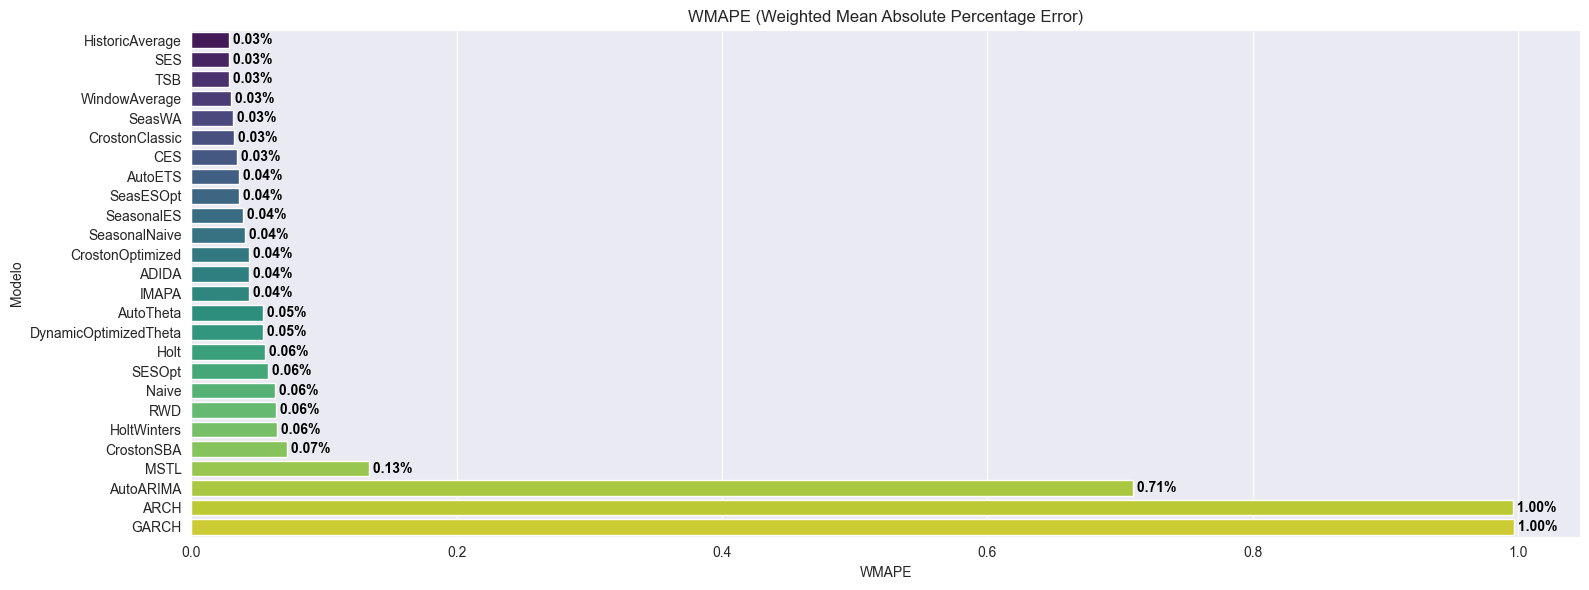

In [97]:
df_sorted = df.sort_values(by='error')
plt.figure(figsize=(16, 6))
sns.barplot(x='error', y='model', data=df_sorted, palette='viridis')
plt.title("WMAPE (Weighted Mean Absolute Percentage Error)")
plt.xlabel("WMAPE")
plt.ylabel("Modelo")

for index, value in enumerate(df_sorted['error']):
    plt.text(value, index, f' {value:.2f}%', va='center', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()